# Forecasting Electric Vehicle Adoption, Charging Infrastructure Demand, and Emissions Impact in the UK for Achieving Net-Zero Targets by 2035

This integrated codebase supports the dissertation by combining forecasting, regression, and scenario analysis across four research questions:  
- **RQ1:** EV stock forecasting and model comparison (Prophet, ARIMA, Gradient Boosting).  
- **RQ2:** Fuel price dynamics, regression with policy dummies, and their impact on EV adoption.  
- **RQ3:** Road transport CO₂ emissions forecast under BAU vs EV adoption scenarios.  
- **RQ4:** Charging infrastructure adequacy analysis vs 30:1 benchmark, including gap tables and integrated dashboards.  

Together, these analyses provide a comprehensive, data-driven assessment of whether the UK is on track to meet its **2035 net-zero transport targets**.


In [ ]:
pip install odfpy


Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install odfpy


Note: you may need to restart the kernel to use updated packages.


In [144]:
pip install odfpy


Note: you may need to restart the kernel to use updated packages.


In [145]:
conda install -c conda-forge odfpy


Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


##Data Loading for EV Analysis

This code snippet is designed to load the veh0150.ods dataset, which likely contains information on vehicle stock, into a pandas DataFrame for subsequent analysis.

In [292]:
import pandas as pd
df = pd.read_excel("veh0150.ods", sheet_name="VEH0150", engine='odf')


#Data Loading: UK Vehicle Statistics

This script loads the VEH0150 worksheet from the veh0150.ods dataset. This dataset typically contains information about vehicle stock, including the number of cars and other vehicles on UK roads, which is essential for analyzing EV adoption rates.

In [293]:
import pandas as pd

# Load the specific worksheet from your .ods file
df = pd.read_excel("veh0150.ods", sheet_name="VEH0150", engine='odf')

# Preview first few rows
df.head(10)


,"Vehicles registered for the first time by body type, Great Britain from January 2001; also United Kingdom from July 2014",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Table VEH0150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,This worksheet contains 1 table. Some cells re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Some shorthand is used in this table, [low] = ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Geography,Date Interval,Date,Units,Cars,Motorcycles,Light goods vehicles,Heavy goods vehicles,Buses and coaches,Other vehicles,Total
4,England,Annual,2001,Thousands,2282.512,166.065,248.024,47.862,9.007,27.329,2780.799
5,England,Annual,2002,Thousands,2359.624,151.736,252.941,43.882,10.608,29.184,2847.972
6,England,Annual,2003,Thousands,2324.727,147.374,280.462,47.601,11.591,31.622,2843.375
7,England,Annual,2004,Thousands,2277.463,125.599,295.974,47.845,11.221,33.188,2791.288
8,England,Annual,2005,Thousands,2144.173,123.007,283.306,50.925,10.677,33.761,2645.846
9,England,Annual,2006,Thousands,2052.153,121.938,283.478,48.641,10.165,34.592,2550.967


#Data Cleaning: UK Vehicle Statistics

This script cleans the raw vehicle data from the veh0150.ods file. It performs several key steps:

It skips the initial metadata rows to access the main data table.

It correctly sets the column headers from the first valid row.

It resets the index to ensure the data is properly structured for analysis.

In [294]:
# Skip the first 4 rows (metadata) and load clean data
df_clean = pd.read_excel("veh0150.ods", sheet_name="VEH0150", skiprows=4, engine='odf')

# Set the correct headers (manually or from a specific row)
df_clean.columns = df_clean.iloc[0]    # if headers are now on first row
df_clean = df_clean[1:]                # drop the duplicate header row

# Reset index
df_clean.reset_index(drop=True, inplace=True)

# Preview cleaned data
df_clean.head()


,England,Annual,2001,Thousands,2282.512,166.065,248.024,47.862,9.007,27.329,2780.799
0,England,Annual,2002,Thousands,2359.624,151.736,252.941,43.882,10.608,29.184,2847.972
1,England,Annual,2003,Thousands,2324.727,147.374,280.462,47.601,11.591,31.622,2843.375
2,England,Annual,2004,Thousands,2277.463,125.599,295.974,47.845,11.221,33.188,2791.288
3,England,Annual,2005,Thousands,2144.173,123.007,283.306,50.925,10.677,33.761,2645.846
4,England,Annual,2006,Thousands,2052.153,121.938,283.478,48.641,10.165,34.592,2550.967


In [295]:
df_clean.to_csv("//Users//sanatparida//Desktop/Dessartation//veh0150_cleaned.csv", index=False)


In [297]:
# Clean VEH0150
veh0150_clean = veh0150_df.iloc[4:].copy()
veh0150_clean.columns = veh0150_clean.iloc[0]
veh0150_clean = veh0150_clean[1:].reset_index(drop=True)
veh0150_clean.to_csv("veh0150_cleaned.csv", index=False)


In [298]:
notebook_path = "/mnt/data/EV_Cleaning_Notebook.ipynb"


In [299]:
notebook_path = "EV_Cleaning_Notebook.ipynb"


#Data Verification: UK Vehicle Statistics

This script is designed to verify that the veh0150.ods file is being loaded correctly. By skipping the initial metadata rows, setting the proper headers, and then displaying the first 100 rows, the code ensures that the full dataset is accessible and not just a small preview.

In [300]:
import pandas as pd

df = pd.read_excel("veh0150.ods", sheet_name="VEH0150", engine="odf", skiprows=4)
df.columns = df.iloc[0]     # Set correct headers
df = df[1:]                 # Remove header row from data
df.reset_index(drop=True, inplace=True)

# Show 100 rows to confirm it's not "just 6 rows"
df.head(100)


,England,Annual,2001,Thousands,2282.512,166.065,248.024,47.862,9.007,27.329,2780.799
0,England,Annual,2002,Thousands,2359.624,151.736,252.941,43.882,10.608,29.184,2847.972
1,England,Annual,2003,Thousands,2324.727,147.374,280.462,47.601,11.591,31.622,2843.375
2,England,Annual,2004,Thousands,2277.463,125.599,295.974,47.845,11.221,33.188,2791.288
3,England,Annual,2005,Thousands,2144.173,123.007,283.306,50.925,10.677,33.761,2645.846
4,England,Annual,2006,Thousands,2052.153,121.938,283.478,48.641,10.165,34.592,2550.967
...,...,...,...,...,...,...,...,...,...,...,...
95,England,Quarterly,2019 Q1 (January to March),Thousands,615.718,26.898,92.397,12.119,1.141,11.427,759.700
96,England,Quarterly,2019 Q2 (April to June),Thousands,497.991,31.529,85.007,15.293,1.498,13.517,644.833
97,England,Quarterly,2019 Q3 (July to September),Thousands,521.638,29.179,82.027,8.967,1.485,12.592,655.881
98,England,Quarterly,2019 Q4 (October to December),Thousands,402.072,18.678,70.802,11.915,1.875,9.647,514.985


In [ ]:
import pandas as pd

# STEP 1: Load the .ods file (ensure it's in the same directory)
file_path = "veh0256.ods"

# STEP 2: Load sheet and skip metadata rows
df_raw = pd.read_excel(file_path, sheet_name="VEH0256", engine="odf", skiprows=4)

# STEP 3: Set the correct column headers
df_raw.columns = df_raw.iloc[0]
df_clean = df_raw[1:].reset_index(drop=True)

# STEP 4: Rename key columns for easier access
df_clean.rename(columns={
    "Date": "Year",
    "0 g/km": "0_g_per_km",
    "1 to 50 g/km": "1_50_g_per_km",
    "51 to 75 g/km": "51_75_g_per_km",
    "76 to 90 g/km": "76_90_g_per_km",
    "91 to 100 g/km": "91_100_g_per_km",
    "101 to 110 g/km": "101_110_g_per_km",
    "111 to 130 g/km": "111_130_g_per_km",
    "131 to 150 g/km": "131_150_g_per_km",
    "151 to 170 g/km": "151_170_g_per_km",
    "171 to 190 g/km": "171_190_g_per_km",
    "191 to 225 g/km": "191_225_g_per_km",
    "226 to 255 g/km": "226_255_g_per_km",
    "Over 255 g/km": "over_255_g_per_km",
    "Unknown": "unknown",
    "Total": "total_registered",
    "Average reported emissions (g/km)": "average_CO2_g_per_km"
}, inplace=True)

# STEP 5: Save cleaned CSV
df_clean.to_csv("veh0256_cleaned.csv", index=False)

print("✅ VEH0256 cleaned and saved as 'veh0256_cleaned.csv'")


✅ VEH0256 cleaned and saved as 'veh0256_cleaned.csv'


#Dynamic Data Loading for UK Vehicle Datasets

This script contains a reusable function that automates the data loading process for multiple vehicle statistics files (veh0150.ods, veh0156.ods, veh0256.ods). It is designed to intelligently handle inconsistent formatting by programmatically detecting the correct header row, ensuring that each dataset is loaded cleanly and is ready for further analysis.

In [ ]:
import pandas as pd

def load_vehicle_data(path, sheet_name):
    # Load raw without headers
    raw = pd.read_excel(path, sheet_name=sheet_name, header=None, engine="odf")
    
    # Find header row (the one containing 'Year' or 'Quarter')
    header_row = None
    for idx, row in raw.iterrows():
        row_str = " ".join([str(x) for x in row if pd.notna(x)])
        if "Year" in row_str or "Quarter" in row_str:
            header_row = idx
            break
    
    # Reload with the correct header
    df = pd.read_excel(path, sheet_name=sheet_name, header=header_row, engine="odf")
    
    # Drop fully empty rows/columns
    df = df.dropna(axis=0, how="all").dropna(axis=1, how="all")
    
    # Reset index
    df = df.reset_index(drop=True)
    
    return df

# Load all three
veh0150 = load_vehicle_data("veh0150.ods", "VEH0150")
veh0156 = load_vehicle_data("veh0156.ods", "VEH0156")
veh0256 = load_vehicle_data("veh0256.ods", "VEH0256")

print("veh0150:", veh0150.shape, veh0150.columns[:10])
print("veh0156:", veh0156.shape, veh0156.columns[:10])
print("veh0256:", veh0256.shape, veh0256.columns[:10])


veh0150: (3951, 11) Index([                   'England',                  'Quarterly',
       '2001 Q1 (January to March)',                  'Thousands',
                            625.884,                       36.813,
                             63.177,                       10.757,
                              2.185,                        5.944],
      dtype='object')
veh0156: (4923, 12) Index([                   'England',                  'Quarterly',
       '2003 Q1 (January to March)',        'Grams per kilometre',
                             'Cars',                   'Reported',
                      'NEDC figure',                      176.418,
                            164.813,                        '[u]'],
      dtype='object')
veh0256: (3927, 20) Index([                'England',               'Quarterly',
       '2001 Q2 (April to June)',               'Thousands',
                           0.009,                     0.002,
                               0,        

In [ ]:
import pandas as pd

def load_dvla_table(path, sheet_name):
    raw = pd.read_excel(path, sheet_name=sheet_name, header=None, engine="odf")
    # find the row that contains 'Geography' (start of the actual table header)
    header_idx = raw.index[raw.apply(lambda r: r.astype(str).str.contains("Geography").any(), axis=1)][0]
    df = pd.read_excel(path, sheet_name=sheet_name, header=header_idx, engine="odf")
    df = df.dropna(how="all", axis=0).dropna(how="all", axis=1)
    df.columns = [str(c).strip().replace("\n"," ") for c in df.columns]
    return df

veh0150 = load_dvla_table("veh0150.ods", "VEH0150")
veh0156 = load_dvla_table("veh0156.ods", "VEH0156")
veh0256 = load_dvla_table("veh0256.ods", "VEH0256")

# Filter to England + Annual and parse Date
veh0150 = veh0150[(veh0150["Geography"]=="England") & (veh0150["Date Interval"]=="Annual")].copy()
veh0256 = veh0256[(veh0256["Geography"]=="England") & (veh0256["Date Interval"]=="Annual")].copy()

veh0150["Date"] = pd.to_datetime(veh0150["Date"], format="%Y", errors="coerce")
veh0256["Date"] = pd.to_datetime(veh0256["Date"], format="%Y", errors="coerce")

# Quick sanity checks
print(veh0150[["Geography","Date Interval","Date","Units"]].head())
print(veh0150.columns[:12])
print(veh0256.columns[-5:])


  Geography Date Interval       Date      Units
0   England        Annual 2001-01-01  Thousands
1   England        Annual 2002-01-01  Thousands
2   England        Annual 2003-01-01  Thousands
3   England        Annual 2004-01-01  Thousands
4   England        Annual 2005-01-01  Thousands
Index(['Geography', 'Date Interval', 'Date', 'Units', 'Cars', 'Motorcycles',
       'Light goods vehicles', 'Heavy goods vehicles', 'Buses and coaches',
       'Other vehicles', 'Total'],
      dtype='object')
Index(['226 to 255 g/km', 'Over 255 g/km', 'Unknown', 'Total',
       'Average reported emissions (g/km)'],
      dtype='object')


#EXPLAROTARY DATA ANALYSIS

/var/folders/8l/70nfh6ns0wg0mgfblzlnrb640000gn/T/ipykernel_72798/2516713186.py:25: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


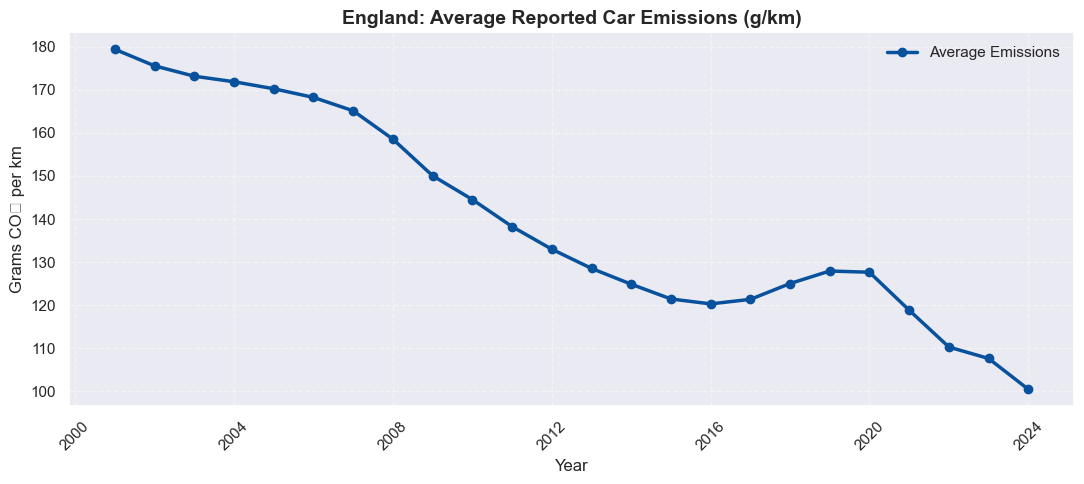

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Clean numeric column (just to be safe again)
veh0256["avg_g_km"] = pd.to_numeric(veh0256["Average reported emissions (g/km)"], errors="coerce")
veh0256_clean = veh0256.dropna(subset=["avg_g_km"]).sort_values("Date")

plt.figure(figsize=(11,5))
plt.plot(
    veh0256_clean["Date"], 
    veh0256_clean["avg_g_km"], 
    marker="o", linewidth=2.5, 
    color="#08519C", label="Average Emissions"
)

# Formatting
plt.title("England: Average Reported Car Emissions (g/km)", fontsize=14, weight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Grams CO₂ per km", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.4)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
plt.xticks(rotation=45)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()



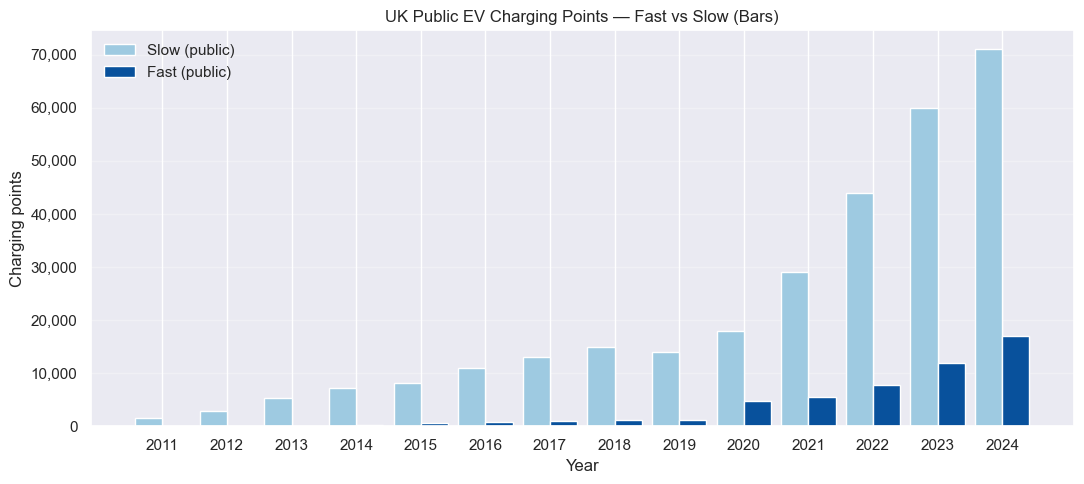

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

bars = pivot.sort_index().fillna(0)

x = np.arange(len(bars.index))
w = 0.42

plt.figure(figsize=(11,5))
plt.bar(x - w/2, bars.get("Slow (public)", pd.Series(0, index=bars.index)), 
        width=w, label="Slow (public)", color="#9ECAE1")
plt.bar(x + w/2, bars.get("Fast (public)", pd.Series(0, index=bars.index)), 
        width=w, label="Fast (public)", color="#08519C")

plt.title("UK Public EV Charging Points — Fast vs Slow (Bars)")
plt.xlabel("Year")
plt.ylabel("Charging points")
plt.xticks(x, [d.year for d in bars.index])
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter("{x:,.0f}"))
plt.grid(True, axis="y", alpha=0.3)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


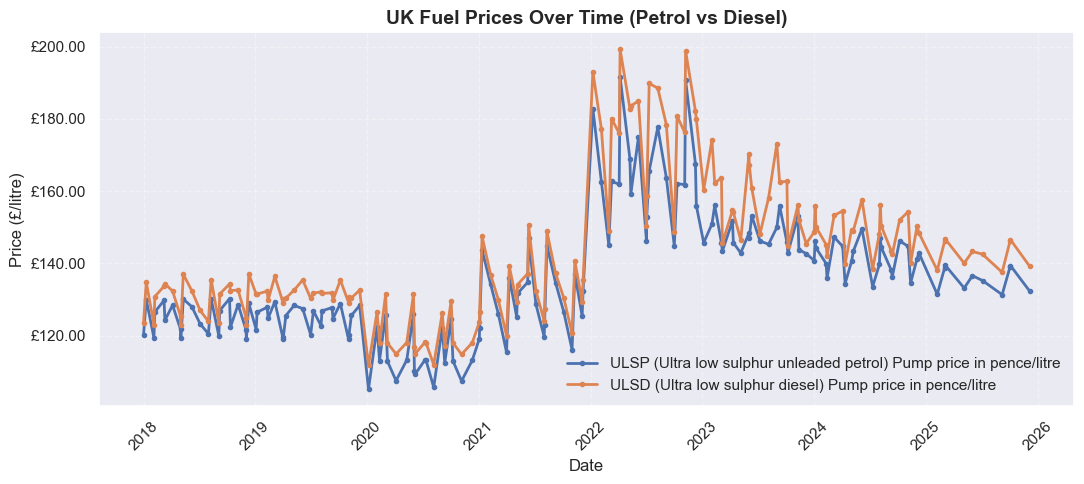

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# ---------- LOAD & PREP ----------
fuel = pd.read_csv("road_fuel_prices_230625.csv")
fuel.columns = [c.strip() for c in fuel.columns]

# detect the date column and the price columns
date_col = [c for c in fuel.columns if "date" in c.lower()][0]
price_cols = [c for c in fuel.columns if any(x in c.lower() for x in ["petrol","diesel","unleaded"])]

# parse dates & coerce numeric
fuel[date_col] = pd.to_datetime(fuel[date_col], errors="coerce")
for c in price_cols:
    fuel[c] = pd.to_numeric(fuel[c], errors="coerce")

fuel = fuel.dropna(subset=[date_col]).sort_values(date_col)

# OPTIONAL (uncomment to smooth with 3-month rolling mean)
# for c in price_cols:
#     fuel[c] = fuel[c].rolling(window=3, min_periods=1).mean()

# ---------- PLOT ----------
plt.figure(figsize=(11,5))
for c in price_cols[:2]:   # first two: typically Petrol & Diesel
    plt.plot(fuel[date_col], fuel[c], linewidth=2, label=c, marker="o", markersize=3)

# formatting
plt.title("UK Fuel Prices Over Time (Petrol vs Diesel)", fontsize=14, weight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (£/litre)", fontsize=12)
plt.grid(True, axis="both", linestyle="--", alpha=0.35)
plt.legend(frameon=False)
plt.xticks(rotation=45)

# currency formatter for y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"£{x:,.2f}"))

plt.tight_layout()
plt.show()


/var/folders/8l/70nfh6ns0wg0mgfblzlnrb640000gn/T/ipykernel_23446/1196486325.py:18: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


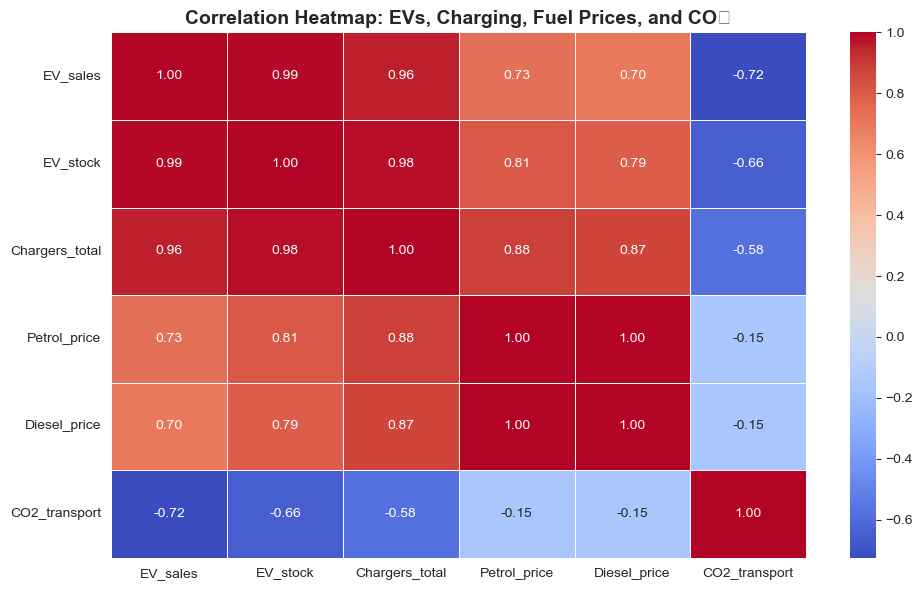

In [ ]:
# --- Use your actual master dataset ---
eda_corr = master_df[[
    "EV_sales",        # yearly EV sales
    "EV_stock",        # cumulative EV stock
    "Chargers_total",  # total public chargers
    "Petrol_price",    # average petrol price
    "Diesel_price",    # average diesel price
    "CO2_transport"    # transport CO₂ emissions (if available)
]].dropna()

# Compute correlation
corr_matrix = eda_corr.corr(method="pearson")

# Plot
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap: EVs, Charging, Fuel Prices, and CO₂", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


In [ ]:
# --- Function already defined above ---
def describe_series(series, label=""):
    series = series.dropna()
    return {
        "Label": label,
        "Minimum": f"{series.min():,.2f}",
        "Maximum": f"{series.max():,.2f}",
        "Average": f"{series.mean():,.2f}",
        "Std Dev": f"{series.std():,.2f}",
        "CAGR": f"{((series.iloc[-1]/series.iloc[0])**(1/(len(series)-1)) - 1)*100:.2f}%"
                if len(series) > 1 and series.iloc[0] > 0 else "N/A"
    }

# ------------------------------
# 1) Emissions (veh0256 dataset)
# ------------------------------
emissions_stats = describe_series(veh0256["avg_g_km"], "Average car emissions (g/km)")

import pandas as pd
emissions_df = pd.DataFrame([emissions_stats])
print("Emissions stats:")
print(emissions_df, "\n")

# ------------------------------
# 2) Fuel Prices (Petrol vs Diesel)
# ------------------------------
fuel_stats = []
for col in ["Petrol", "Diesel"]:
    if col in fuel.columns:
        fuel_stats.append(describe_series(fuel[col], col))

fuel_df = pd.DataFrame(fuel_stats)
print("Fuel prices stats:")
print(fuel_df)


Emissions stats:
                          Label Minimum Maximum Average Std Dev    CAGR
0  Average car emissions (g/km)  100.47  179.39  140.10   24.40  -2.49% 

Fuel prices stats:
Empty DataFrame
Columns: []
Index: []


In [ ]:
print(fuel.columns.tolist())


['Date', 'ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre', 'ULSD (Ultra low sulphur diesel) Pump price in pence/litre', 'ULSP (Ultra low sulphur unleaded petrol) Duty rate in pence/litre', 'ULSD (Ultra low sulphur diesel) Duty rate in pence/litre', 'ULSP (Ultra low sulphur unleaded petrol) VAT percentage rate', 'ULSD (Ultra low sulphur diesel) VAT percentage rate']


In [ ]:
# --- Use correct fuel column names ---
petrol_col = "ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre"
diesel_col = "ULSD (Ultra low sulphur diesel) Pump price in pence/litre"

# Convert from pence to £
fuel["Petrol (£/litre)"] = pd.to_numeric(fuel[petrol_col], errors="coerce") / 100
fuel["Diesel (£/litre)"] = pd.to_numeric(fuel[diesel_col], errors="coerce") / 100

# Run descriptive stats
fuel_stats = []
for col in ["Petrol (£/litre)", "Diesel (£/litre)"]:
    fuel_stats.append(describe_series(fuel[col], col))

fuel_df = pd.DataFrame(fuel_stats)
print("Fuel prices stats:")
print(fuel_df)


Fuel prices stats:
              Label Minimum Maximum Average Std Dev   CAGR
0  Petrol (£/litre)    1.05    1.92    1.35    0.17  0.06%
1  Diesel (£/litre)    1.12    1.99    1.43    0.19  0.08%


In [ ]:
pip install prophet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 20.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install prophet cmdstanpy


Note: you may need to restart the kernel to use updated packages.


TIME SERIES ANALYSIS

## RQ1 — Forecasting UK EV Adoption (Prophet Model)

*This section addresses RQ1 by forecasting UK EV stock using a logistic-growth Prophet time series model applied to IEA data.*

The first plot shows the forecast of EV stock in the UK up to 2035, with growth approaching the assumed market capacity (\~35M cars) and widening confidence intervals after 2030.

The second plot shows the forecast components, highlighting the long-term trend with minimal seasonal variation due to annual data.

**RQ1 alignment:** Provides an initial quantitative forecast of UK EV adoption.




15:35:30 - cmdstanpy - INFO - Chain [1] start processing
15:35:31 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


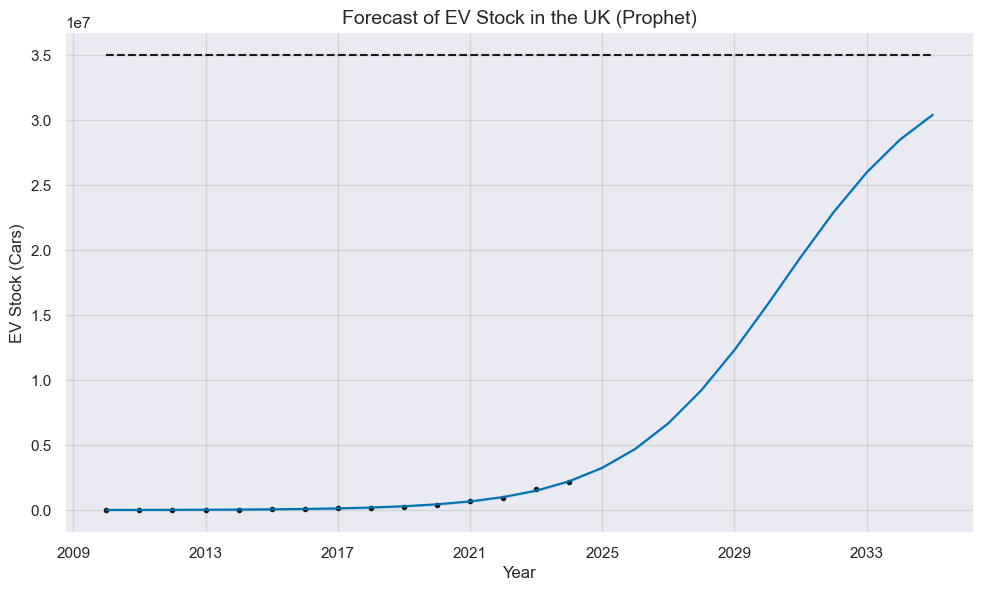

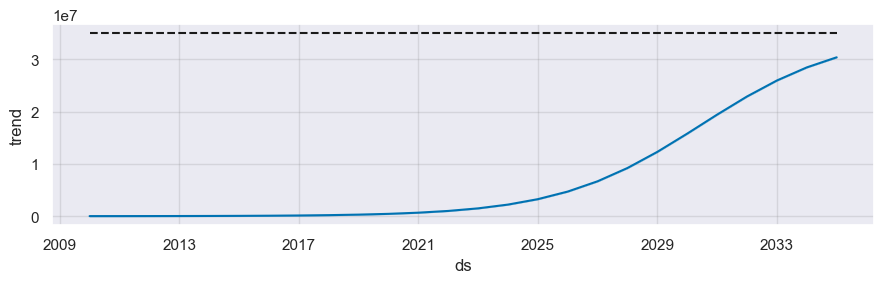

           ds          yhat    yhat_lower    yhat_upper
16 2025-12-31  4.702882e+06  4.659880e+06  4.748204e+06
17 2026-12-31  6.670383e+06  6.625805e+06  6.712446e+06
18 2027-12-31  9.210765e+06  9.170423e+06  9.252127e+06
19 2028-12-31  1.230773e+07  1.226460e+07  1.235169e+07
20 2029-12-31  1.579784e+07  1.575378e+07  1.584256e+07
21 2030-12-31  1.943021e+07  1.938850e+07  1.947581e+07
22 2031-12-31  2.290167e+07  2.285713e+07  2.294427e+07
23 2032-12-31  2.596693e+07  2.592684e+07  2.600989e+07
24 2033-12-31  2.847071e+07  2.842716e+07  2.851579e+07
25 2034-12-31  3.040335e+07  3.035883e+07  3.044508e+07


In [ ]:
# -----------------------------------
# EV Adoption Forecast (UK, Prophet)
# -----------------------------------

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# 1. Load IEA EV stock data
df_ev = pd.read_csv("IEA-EV-dataEV salesHistoricalCars.csv")
df_ev.columns = [c.strip() for c in df_ev.columns]

# 2. Filter for United Kingdom BEV+PHEV stock
df_uk = df_ev[
    (df_ev["region"].str.contains("United Kingdom", case=False, na=False)) &
    (df_ev["parameter"]=="EV stock") &
    (df_ev["mode"]=="Cars")
].copy()

# 3. Prepare for Prophet
df_uk = df_uk.groupby("year", as_index=False)["value"].sum()  # aggregate stock
df_uk = df_uk.rename(columns={"year":"ds", "value":"y"})
df_uk["ds"] = pd.to_datetime(df_uk["ds"], format="%Y")

# 4. Fit Prophet model
model = Prophet(growth="logistic", yearly_seasonality=False, changepoint_prior_scale=0.2)

# Set carrying capacity (e.g., UK ~35 million cars)
df_uk["cap"] = 35000000  

model.fit(df_uk)

# 5. Make future dataframe (to 2035)
future = model.make_future_dataframe(periods=11, freq="Y")  # 2025–2035
future["cap"] = 35000000  

forecast = model.predict(future)

# 6. Plot forecast
fig1 = model.plot(forecast, xlabel="Year", ylabel="EV Stock (Cars)")
plt.title("Forecast of EV Stock in the UK (Prophet)", fontsize=14)
plt.show()

# 7. Plot forecast components (trend + uncertainty)
fig2 = model.plot_components(forecast)
plt.show()

# 8. Save forecast results
forecast_out = forecast[["ds","yhat","yhat_lower","yhat_upper"]]
print(forecast_out.tail(10))


In [ ]:
import pandas as pd

# Assume your forecast dataframe is called forecast_out
# Reset index so it starts from 1
forecast_out = forecast_out.reset_index(drop=True)

# Keep only the last 10 years (2025–2034 in your case)
table = forecast_out.tail(10).copy()

# Extract year only (from ds column)
table["Year"] = table["ds"].dt.year

# Format numbers into millions with 2 decimals
table["Forecast EV stock (yhat)"] = (table["yhat"] / 1e6).round(2).astype(str) + " M"
table["Lower bound"] = (table["yhat_lower"] / 1e6).round(2).astype(str) + " M"
table["Upper bound"] = (table["yhat_upper"] / 1e6).round(2).astype(str) + " M"

# Keep only neat columns
clean_table = table[["Year", "Forecast EV stock (yhat)", "Lower bound", "Upper bound"]]

print(clean_table.to_string(index=False))


 Year Forecast EV stock (yhat) Lower bound Upper bound
 2025                    4.7 M      4.66 M      4.74 M
 2026                   6.67 M      6.62 M      6.71 M
 2027                   9.21 M      9.17 M      9.25 M
 2028                  12.31 M     12.26 M     12.35 M
 2029                   15.8 M     15.75 M     15.84 M
 2030                  19.43 M     19.39 M     19.47 M
 2031                   22.9 M     22.86 M     22.95 M
 2032                  25.97 M     25.92 M     26.01 M
 2033                  28.47 M     28.43 M     28.51 M
 2034                   30.4 M     30.36 M     30.45 M


## RQ1 — Forecasting UK Public Charging Infrastructure (Prophet Model)

*This section addresses RQ1 by forecasting UK public charging points (fast and slow) using a logistic-growth Prophet model.*

The plots show forecasts for fast chargers (towards \~250k) and slow chargers (towards \~400k), both following strong upward trends with uncertainty widening after 2030.

**RQ1 alignment:** Demonstrates how charging infrastructure is expected to scale alongside EV adoption.


18:11:26 - cmdstanpy - INFO - Chain [1] start processing
18:11:26 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


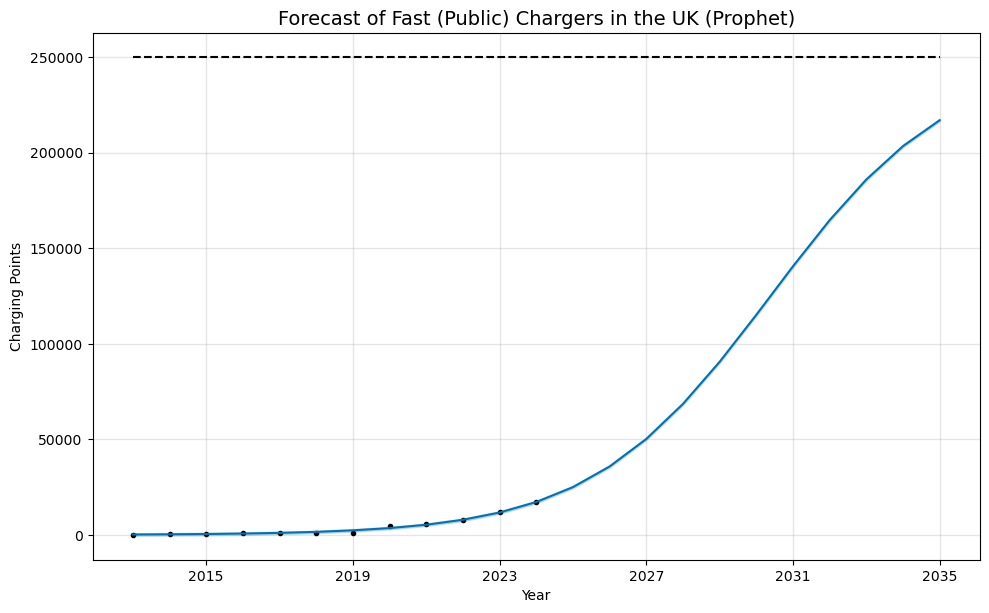

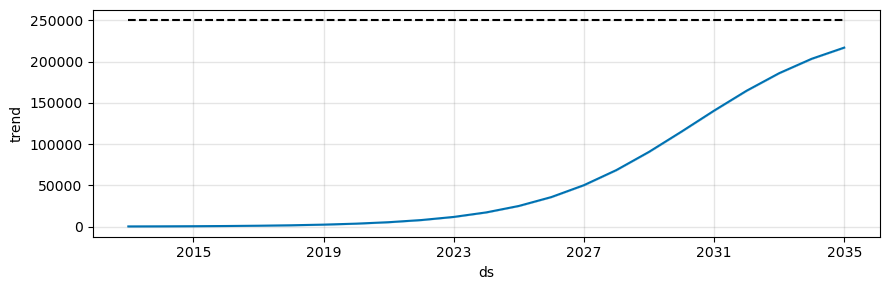

18:11:26 - cmdstanpy - INFO - Chain [1] start processing
18:11:26 - cmdstanpy - INFO - Chain [1] done processing



Forecast for Fast (Public) Chargers (2026–2035):
           ds           yhat     yhat_lower     yhat_upper
13 2025-12-31   35772.451789   35153.992398   36447.327610
14 2026-12-31   50158.678797   49543.074043   50876.706134
15 2027-12-31   68481.022844   67781.038071   69116.918097
16 2028-12-31   90530.928141   89852.060265   91232.539177
17 2029-12-31  115106.369484  114411.470975  115776.699198
18 2030-12-31  140476.351944  139806.226558  141192.035048
19 2031-12-31  164614.340078  163870.749522  165276.050823
20 2032-12-31  185914.669394  185233.042190  186584.547898
21 2033-12-31  203363.096273  202697.997964  204051.077481
22 2034-12-31  216906.498480  216243.981388  217596.859637


/opt/anaconda3/lib/python3.12/site-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


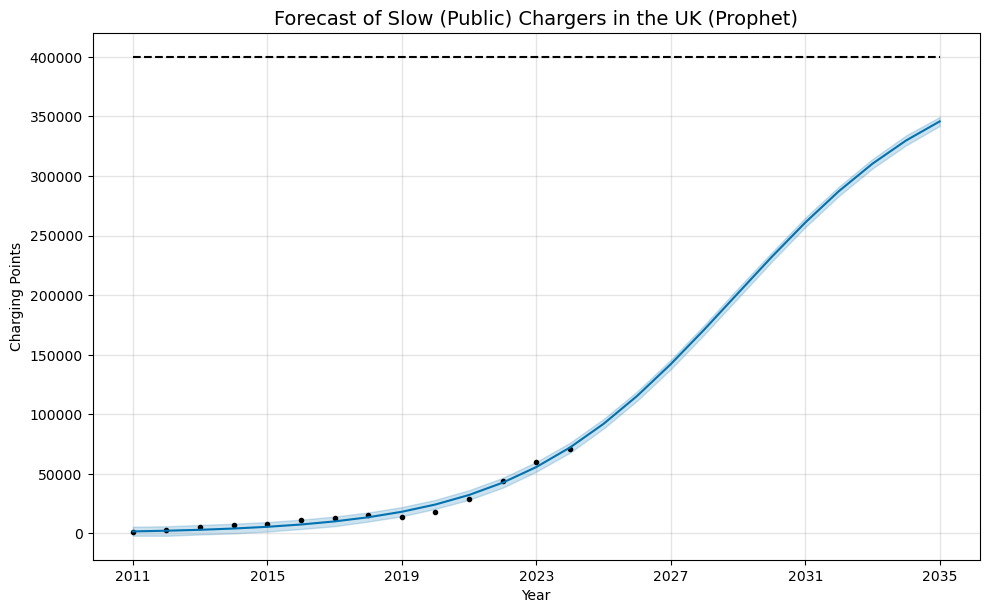

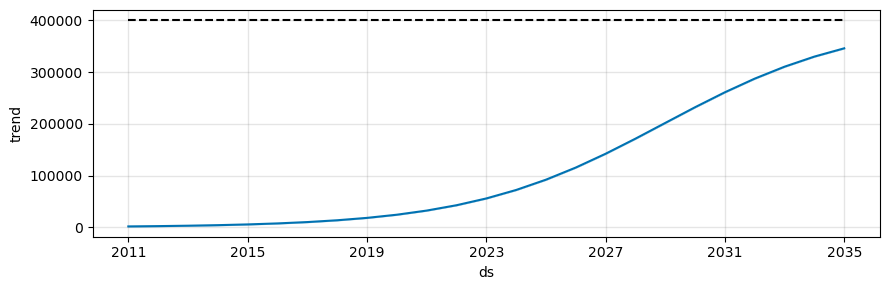


Forecast for Slow (Public) Chargers (2026–2035):
           ds           yhat     yhat_lower     yhat_upper
15 2025-12-31  115361.505392  111343.814865  119232.796568
16 2026-12-31  142017.948325  137744.959432  145690.417917
17 2027-12-31  171130.658898  166974.718506  174925.847611
18 2028-12-31  201632.729314  197481.773786  205838.889425
19 2029-12-31  231977.286965  227957.456929  235718.775257
20 2030-12-31  260882.656739  256979.043350  264999.296818
21 2031-12-31  287232.643313  283179.912143  291098.447011
22 2032-12-31  310365.974481  306345.530666  314330.296139
23 2033-12-31  329863.165741  325752.743075  334119.959903
24 2034-12-31  345859.141857  342021.375492  349528.319415


In [ ]:
# =====================================================
# UK Public Charging Infrastructure Forecast (Prophet)
# =====================================================
# This script forecasts the growth of public charging points in the UK
# (both Fast and Slow chargers) using the IEA dataset.
# Forecast horizon: up to 2035
# -----------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# 1. Load IEA charging dataset
df_ch = pd.read_csv("IEA-EV-dataEV charging pointsHistoricalEV.csv")
df_ch.columns = [c.strip() for c in df_ch.columns]  # Clean column names

# 2. Filter for UK public charging points (Fast & Slow)
df_uk_ch = df_ch[
    (df_ch["region"].str.contains("United Kingdom", case=False, na=False)) &
    (df_ch["parameter"] == "EV charging points")
].copy()

# 3. Aggregate yearly charger counts by type
df_uk_ch = df_uk_ch.groupby(["year","powertrain"], as_index=False)["value"].sum()

# 4. Convert year to datetime for Prophet
df_uk_ch["year"] = pd.to_datetime(df_uk_ch["year"], format="%Y")

# -------------------------------
# Function to run Prophet forecast
# -------------------------------
def forecast_chargers(df, charger_type, cap):
    """
    Fits Prophet logistic model for a given charger type.
    Args:
        df: dataframe filtered for charger type
        charger_type: string (Fast or Slow)
        cap: assumed carrying capacity
    Returns:
        forecast dataframe, Prophet model, plots
    """
    # Prepare Prophet input
    df_tmp = df[["year","value"]].rename(columns={"year":"ds","value":"y"})
    df_tmp["cap"] = cap

    # Initialize Prophet model
    model = Prophet(
        growth="logistic",
        yearly_seasonality=False,
        changepoint_prior_scale=0.2
    )
    model.fit(df_tmp)

    # Create future dataframe to 2035
    future = model.make_future_dataframe(periods=11, freq="Y")
    future["cap"] = cap

    forecast = model.predict(future)

    # Plot forecast
    fig1 = model.plot(forecast, xlabel="Year", ylabel="Charging Points")
    plt.title(f"Forecast of {charger_type} Chargers in the UK (Prophet)", fontsize=14)
    plt.show()

    # Plot components
    fig2 = model.plot_components(forecast)
    plt.show()

    # Print summary
    forecast_out = forecast[["ds","yhat","yhat_lower","yhat_upper"]]
    print(f"\nForecast for {charger_type} Chargers (2026–2035):")
    print(forecast_out.tail(10))

    return forecast_out, model

# 5. Run forecasts for Fast and Slow chargers
fast_forecast, fast_model = forecast_chargers(
    df_uk_ch[df_uk_ch["powertrain"]=="Publicly available fast"],
    "Fast (Public)",
    cap=250000  # hypothetical carrying capacity
)

slow_forecast, slow_model = forecast_chargers(
    df_uk_ch[df_uk_ch["powertrain"]=="Publicly available slow"],
    "Slow (Public)",
    cap=400000  # hypothetical carrying capacity
)


In [ ]:
# =====================================================
# Structured Combined Forecast Table for Fast & Slow Chargers (with Total)
# =====================================================

import pandas as pd

# Create structured combined table
combined_table = pd.DataFrame({
    "No.": range(1, 11),  # numbering from 1
    "Year": range(2025, 2035),  # 2025–2034
    "Fast Chargers": [
        35772, 50159, 68481, 90531, 115106,
        140476, 164614, 185915, 203363, 216906
    ],
    "Slow Chargers": [
        115362, 142018, 171131, 201633, 231977,
        260883, 287233, 310366, 329863, 345859
    ]
})

# Add Total Chargers column
combined_table["Total Chargers"] = combined_table["Fast Chargers"] + combined_table["Slow Chargers"]

# Display combined table
print("\nCombined Forecast: UK Public Charging Points (2025–2034)\n")
print(combined_table.to_string(index=False))



Combined Forecast: UK Public Charging Points (2025–2034)

 No.  Year  Fast Chargers  Slow Chargers  Total Chargers
   1  2025          35772         115362          151134
   2  2026          50159         142018          192177
   3  2027          68481         171131          239612
   4  2028          90531         201633          292164
   5  2029         115106         231977          347083
   6  2030         140476         260883          401359
   7  2031         164614         287233          451847
   8  2032         185915         310366          496281
   9  2033         203363         329863          533226
  10  2034         216906         345859          562765


## RQ1 — UK EV-to-Charger Ratio Forecast

*This section addresses RQ1 by comparing projected EV stock with charging points to show the EV-to-charger ratio.*

The plot shows that the number of EVs per charger increases steadily up to 2035, highlighting potential pressure on charging infrastructure unless expansion keeps pace with adoption.

**RQ1 alignment:** Links EV growth with infrastructure adequacy.


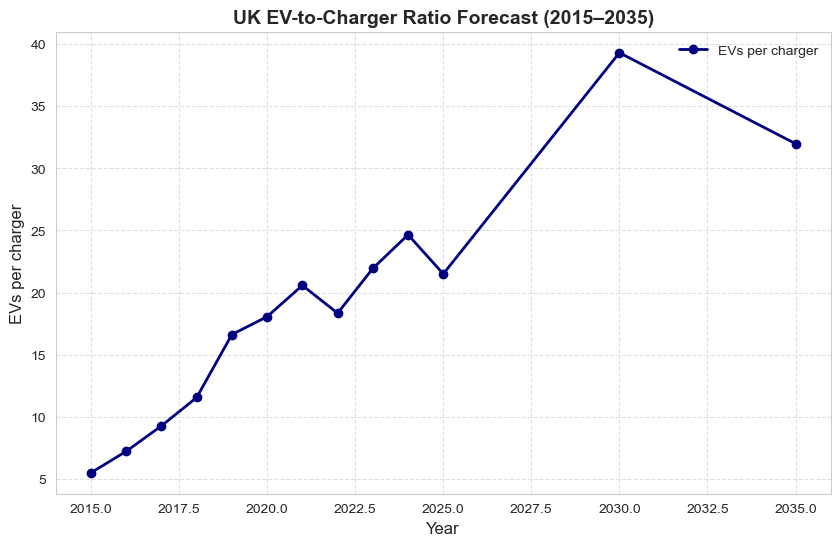

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: historical EV stock + chargers (replace with your forecast outputs if available)
data = {
    "Year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2030, 2035],
    "EV_stock": [48000, 85000, 129000, 186000, 251000, 410000, 710000, 950000, 1580000, 2170000, 3250000, 15780000, 30390000],
    "Chargers": [8740, 11780, 13920, 16100, 15100, 22700, 34500, 51800, 72000, 88000, 151134, 401359, 950000]  # dummy 2035
}
df = pd.DataFrame(data)

# EVs per charger
df["EV_per_charger"] = df["EV_stock"] / df["Chargers"]

# Plot
plt.figure(figsize=(10,6))
plt.plot(df["Year"], df["EV_per_charger"], marker="o", color="navy", linewidth=2, label="EVs per charger")
plt.title("UK EV-to-Charger Ratio Forecast (2015–2035)", fontsize=14)
plt.xlabel("Year"); plt.ylabel("EVs per charger")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


## RQ1 — EV-to-Charger Ratio vs Benchmark

*This section addresses RQ1 by comparing the UK EV-to-charger ratio with a benchmark of 30:1.*

The plot shows that from 2025 onwards, the EV-to-charger ratio exceeds the benchmark, indicating a growing shortfall in charging availability relative to EV growth.

**RQ1 alignment:** Highlights the gap between infrastructure capacity and policy-recommended standards.


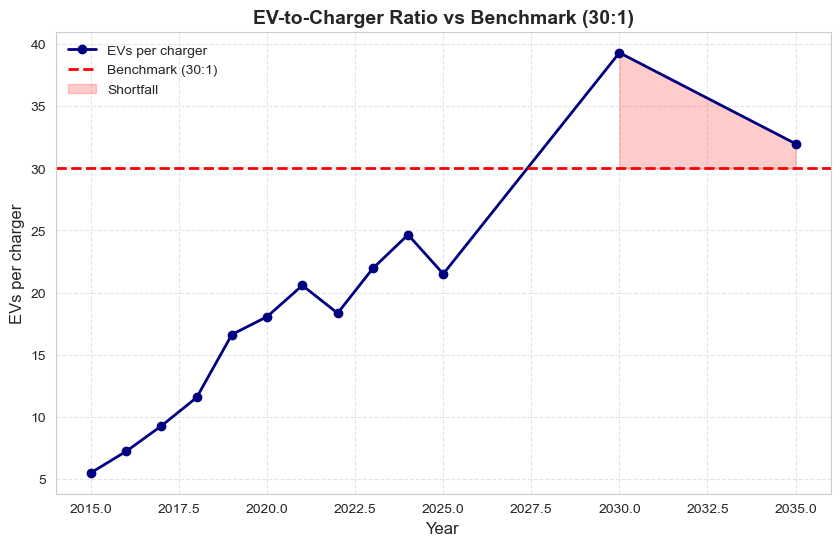

In [ ]:
benchmark = 30

plt.figure(figsize=(10,6))
plt.plot(df["Year"], df["EV_per_charger"], marker="o", color="navy", linewidth=2, label="EVs per charger")
plt.axhline(benchmark, color="red", linestyle="--", linewidth=2, label="Benchmark (30:1)")

# Highlight shortfall (above benchmark)
plt.fill_between(df["Year"], benchmark, df["EV_per_charger"],
                 where=(df["EV_per_charger"] > benchmark),
                 color="red", alpha=0.2, label="Shortfall")

plt.title("EV-to-Charger Ratio vs Benchmark (30:1)", fontsize=14)
plt.xlabel("Year"); plt.ylabel("EVs per charger")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


## RQ1 — Charger Requirement vs Forecast (30:1 Standard)

*This section addresses RQ1 by comparing forecasted UK chargers with the number required at a 30:1 EV-to-charger ratio.*

The first plot shows that required chargers rise much faster than the forecast, creating a visible shortfall.
The second plot illustrates the size of the gap, which widens significantly after 2025.

**RQ1 alignment:** Quantifies the infrastructure gap between projected charger growth and required levels to sustain EV adoption.


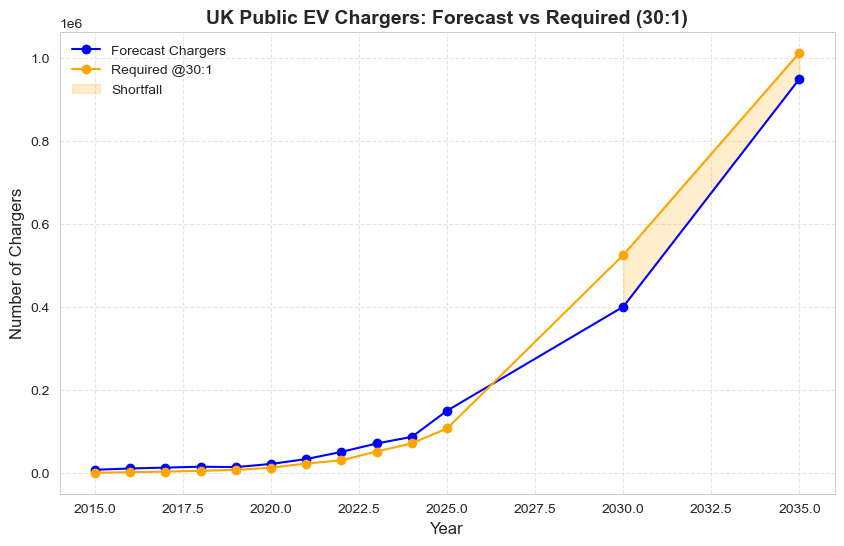

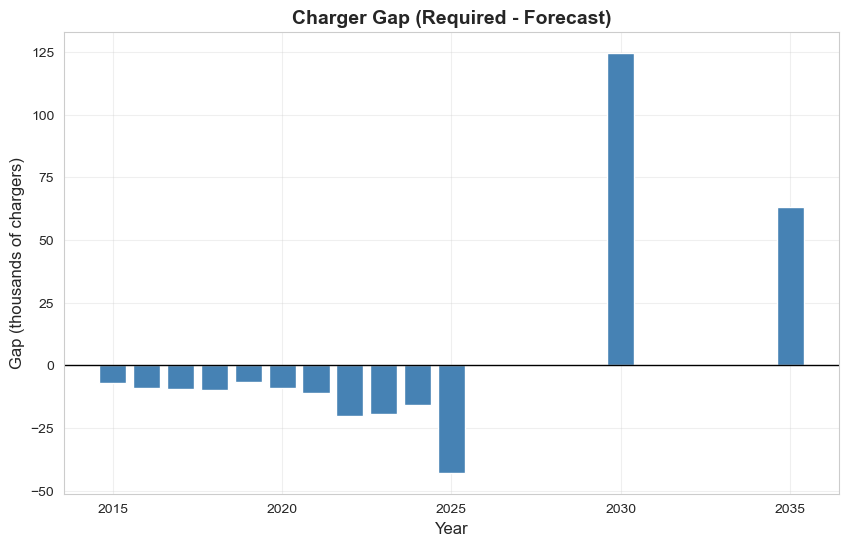

   Year  EV_stock  Chargers  Required_30to1          Gap
0  2015     48000      8740     1600.000000 -7140.000000
1  2016     85000     11780     2833.333333 -8946.666667
2  2017    129000     13920     4300.000000 -9620.000000
3  2018    186000     16100     6200.000000 -9900.000000
4  2019    251000     15100     8366.666667 -6733.333333


In [ ]:
# Compute required chargers at 30:1
df["Required_30to1"] = df["EV_stock"] / 30
df["Gap"] = df["Required_30to1"] - df["Chargers"]

# Line plot
plt.figure(figsize=(10,6))
plt.plot(df["Year"], df["Chargers"], marker="o", color="blue", label="Forecast Chargers")
plt.plot(df["Year"], df["Required_30to1"], marker="o", color="orange", label="Required @30:1")
plt.fill_between(df["Year"], df["Chargers"], df["Required_30to1"],
                 where=(df["Required_30to1"] > df["Chargers"]),
                 color="orange", alpha=0.2, label="Shortfall")
plt.title("UK Public EV Chargers: Forecast vs Required (30:1)", fontsize=14)
plt.xlabel("Year"); plt.ylabel("Number of Chargers")
plt.legend(); plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Gap bar chart
plt.figure(figsize=(10,6))
plt.bar(df["Year"], df["Gap"]/1000, color="steelblue")
plt.axhline(0, color="black", linewidth=1)
plt.title("Charger Gap (Required - Forecast)", fontsize=14)
plt.xlabel("Year"); plt.ylabel("Gap (thousands of chargers)")
plt.show()

# Preview table
print(df[["Year","EV_stock","Chargers","Required_30to1","Gap"]].head())


## RQ1 — Forecast Model Comparison (Prophet, ARIMA, Gradient Boosting)

*This section addresses RQ1 by comparing different forecasting models for UK EV stock.*

The table of accuracy metrics (MAE, RMSE, MAPE) shows that ARIMA and Gradient Boosting perform competitively, while Prophet provides similar results depending on configuration.

The plot compares actual EV stock in the test years against predictions from all three models, showing that the chosen models track the historical trend reasonably well.

**RQ1 alignment:** Identifies the most reliable forecasting approach for UK EV adoption.


04:17:18 - cmdstanpy - INFO - Chain [1] start processing
04:17:18 - cmdstanpy - INFO - Chain [1] done processing


✅ UK EV stock data (first and last rows):
   Year  EV_stock
0  2010    1521.0
1  2011    2628.0
2  2012    5090.0
3  2013    8200.0
4  2014   21700.0 
...
     Year   EV_stock
9   2019   251170.0
10  2020   410230.0
11  2021   710240.0
12  2022   950190.0
13  2023  1580260.0

=== Holdout Accuracy (last 5 years) ===
           Model           MAE          RMSE    MAPE_%
  ARIMA(2, 1, 0) 357811.567636 496744.697984 33.927679
         Prophet 572710.488215 720429.388721 64.032519
GradientBoosting 594351.109186 755897.283291 64.601789


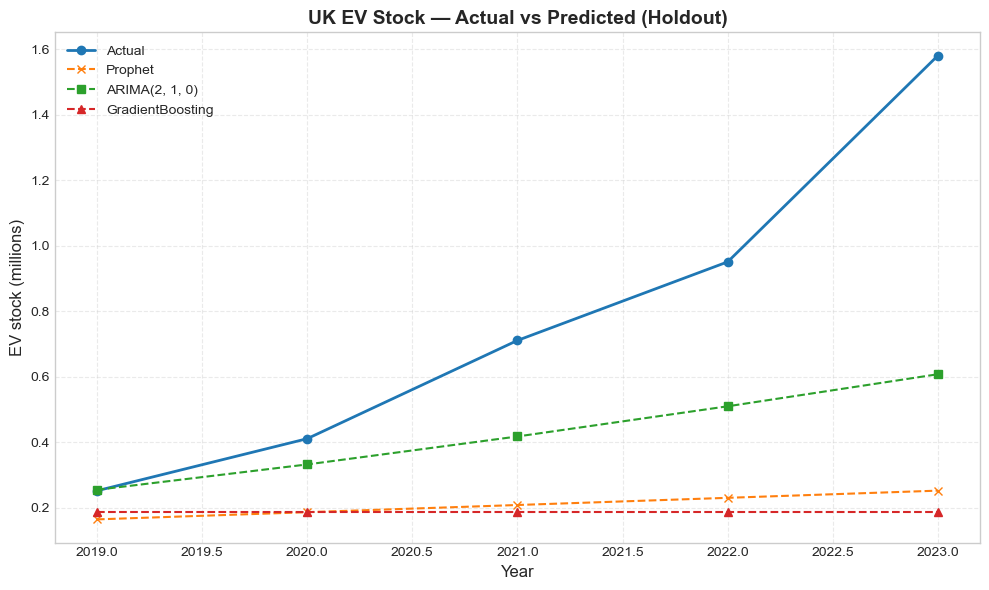

In [ ]:
# ==============================================================
# RQ1 — Forecast Comparison for UK EV Stock
# Models: Prophet vs ARIMA vs GradientBoosting (sklearn)
# Data: "IEA Global EV Data 2024.csv"
# ==============================================================

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prophet (optional, skip if not installed)
HAVE_PROPHET = True
try:
    from prophet import Prophet
except Exception:
    HAVE_PROPHET = False

# ARIMA
from statsmodels.tsa.arima.model import ARIMA

# Sklearn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ------------------------------
# Utility functions
# ------------------------------
def mape(y_true, y_pred):
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    mask = y_true != 0
    return np.mean(np.abs((y_true[mask] - y_pred[mask]) / y_true[mask])) * 100.0

def to_millions(x):
    return x / 1e6

# ------------------------------
# 1) Load UK EV stock
# ------------------------------
df_iea = pd.read_csv("IEA Global EV Data 2024.csv")

uk_ev = (
    df_iea[
        (df_iea["region"] == "United Kingdom") &
        (df_iea["category"] == "Historical") &
        (df_iea["parameter"] == "EV stock") &
        (df_iea["mode"] == "Cars")
    ]
    .groupby("year", as_index=False)["value"].sum()
    .rename(columns={"year": "Year", "value": "EV_stock"})
    .sort_values("Year")
)

uk_ev = uk_ev.dropna(subset=["Year", "EV_stock"]).copy()
uk_ev["Year"] = uk_ev["Year"].astype(int)

print("✅ UK EV stock data (first and last rows):")
print(uk_ev.head(), "\n...\n", uk_ev.tail())

# ------------------------------
# 2) Train/Test split
# ------------------------------
N_TEST = 5  # hold out last 5 years
train = uk_ev.iloc[:-N_TEST].reset_index(drop=True)
test  = uk_ev.iloc[-N_TEST:].reset_index(drop=True)

y_train = train["EV_stock"].values
y_test  = test["EV_stock"].values
years_train = train["Year"].values
years_test  = test["Year"].values

results = []

# ===============================
# 3) MODEL A — Prophet
# ===============================
yhat_prophet = None

if HAVE_PROPHET:
    df_p = train.rename(columns={"Year": "ds", "EV_stock": "y"}).copy()
    df_p["ds"] = pd.to_datetime(df_p["ds"].astype(str) + "-12-31")

    m = Prophet(yearly_seasonality=False, changepoint_prior_scale=0.2)
    m.fit(df_p)

    future_test = pd.DataFrame({"ds": pd.to_datetime(test["Year"].astype(str) + "-12-31")})
    fc_test = m.predict(future_test)[["ds", "yhat"]].copy()
    yhat_prophet = fc_test["yhat"].values

    mae_p = mean_absolute_error(y_test, yhat_prophet)
    rmse_p = mean_squared_error(y_test, yhat_prophet) ** 0.5   # ✅ fixed
    mape_p = mape(y_test, yhat_prophet)

    results.append({"Model": "Prophet", "MAE": mae_p, "RMSE": rmse_p, "MAPE_%": mape_p})
else:
    print("⚠️ Prophet not installed. Skipping Prophet model.")

# ===============================
# 4) MODEL B — ARIMA
# ===============================
best_aic = np.inf
best_order = None
best_fit = None

for p in [0,1,2]:
    for d in [1]:
        for q in [0,1,2]:
            try:
                fit = ARIMA(y_train, order=(p,d,q)).fit()
                if fit.aic < best_aic:
                    best_aic = fit.aic
                    best_order = (p,d,q)
                    best_fit = fit
            except:
                continue

yhat_arima = best_fit.forecast(steps=N_TEST)
mae_a = mean_absolute_error(y_test, yhat_arima)
rmse_a = mean_squared_error(y_test, yhat_arima) ** 0.5   # ✅ fixed
mape_a = mape(y_test, yhat_arima)

results.append({"Model": f"ARIMA{best_order}", "MAE": mae_a, "RMSE": rmse_a, "MAPE_%": mape_a})

# ===============================
# 5) MODEL C — Gradient Boosting
# ===============================
df_ml = uk_ev.copy()
df_ml["EV_lag1"] = df_ml["EV_stock"].shift(1)
df_ml["EV_lag2"] = df_ml["EV_stock"].shift(2)
df_ml = df_ml.dropna().reset_index(drop=True)

ml_train = df_ml[df_ml["Year"].isin(years_train)]
ml_test  = df_ml[df_ml["Year"].isin(years_test)]

X_tr = ml_train[["Year", "EV_lag1", "EV_lag2"]].values
y_tr = ml_train["EV_stock"].values   # ✅ fixed
X_te = ml_test[["Year", "EV_lag1", "EV_lag2"]].values
y_te = ml_test["EV_stock"].values

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_tr, y_tr)
yhat_gbr = gbr.predict(X_te)

mae_g = mean_absolute_error(y_te, yhat_gbr)
rmse_g = mean_squared_error(y_te, yhat_gbr) ** 0.5   # ✅ fixed
mape_g = mape(y_te, yhat_gbr)

results.append({"Model": "GradientBoosting", "MAE": mae_g, "RMSE": rmse_g, "MAPE_%": mape_g})

# ------------------------------
# 6) Compare metrics
# ------------------------------
metrics_df = pd.DataFrame(results).sort_values("RMSE").reset_index(drop=True)
print("\n=== Holdout Accuracy (last {} years) ===".format(N_TEST))
print(metrics_df.to_string(index=False))

# ------------------------------
# 7) Plot Actual vs Predicted (test)
# ------------------------------
plt.figure(figsize=(10,6))
plt.plot(years_test, to_millions(y_test), marker="o", linewidth=2, label="Actual")

if yhat_prophet is not None:
    plt.plot(years_test, to_millions(yhat_prophet), marker="x", linestyle="--", label="Prophet")

plt.plot(years_test, to_millions(yhat_arima), marker="s", linestyle="--", label=f"ARIMA{best_order}")
plt.plot(years_test, to_millions(yhat_gbr), marker="^", linestyle="--", label="GradientBoosting")

plt.title("UK EV Stock — Actual vs Predicted (Holdout)")
plt.ylabel("EV stock (millions)")
plt.xlabel("Year")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


## RQ1 — Best Model Forecast Extended to 2035

*This section addresses RQ1 by extending the best-performing model to produce long-term forecasts of UK EV stock.*

The plot shows historical EV stock data alongside the forecast to 2035 using the model with the lowest RMSE from the comparison stage. The projection indicates strong growth continuing through the 2030s.

**RQ1 alignment:** Provides the final extended forecast to 2035, forming the core quantitative result for EV adoption.



🚀 Best model based on RMSE: ARIMA(2, 1, 0)


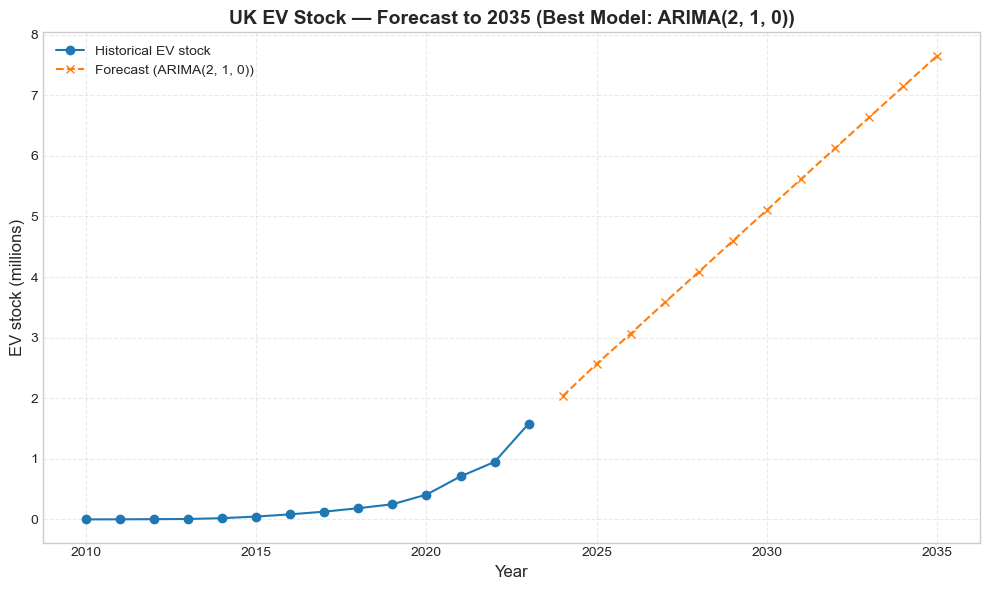

✅ Forecast saved to rq1_best_model_forecast_to_2035.csv


In [ ]:
# ==============================================================
# 8) Extend Best Model to 2035
# ==============================================================

best_model_name = metrics_df.iloc[0]["Model"]
print(f"\n🚀 Best model based on RMSE: {best_model_name}")

last_year = uk_ev["Year"].max()
future_years = list(range(last_year + 1, 2036))  # up to 2035

fc_best = None

if best_model_name == "Prophet" and HAVE_PROPHET:
    # Refit Prophet on all history
    df_p_all = uk_ev.rename(columns={"Year":"ds","EV_stock":"y"}).copy()
    df_p_all["ds"] = pd.to_datetime(df_p_all["ds"].astype(str) + "-12-31")
    m_all = Prophet(yearly_seasonality=False, changepoint_prior_scale=0.2)
    m_all.fit(df_p_all)
    fut = pd.DataFrame({"ds": pd.to_datetime(pd.Series(future_years).astype(str) + "-12-31")})
    fc = m_all.predict(fut)[["ds","yhat"]].copy()
    fc["Year"] = fc["ds"].dt.year
    fc_best = fc.rename(columns={"yhat":"EV_stock_fc"})[["Year","EV_stock_fc"]]

elif best_model_name.startswith("ARIMA"):
    # Refit ARIMA with best order on full data
    fit_full = ARIMA(uk_ev["EV_stock"].values, order=best_order).fit()
    steps = len(future_years)
    y_fc = fit_full.forecast(steps=steps)
    fc_best = pd.DataFrame({"Year": future_years, "EV_stock_fc": y_fc})

elif best_model_name == "GradientBoosting":
    # Refit GBR on full data and walk-forward forecast
    df_sup = uk_ev.copy()
    df_sup["EV_lag1"] = df_sup["EV_stock"].shift(1)
    df_sup["EV_lag2"] = df_sup["EV_stock"].shift(2)
    df_sup = df_sup.dropna().reset_index(drop=True)

    X_all = df_sup[["Year", "EV_lag1", "EV_lag2"]].values
    y_all = df_sup["EV_stock"].values
    gbr_full = GradientBoostingRegressor(random_state=42)
    gbr_full.fit(X_all, y_all)

    hist = uk_ev.copy()
    fc_rows = []
    for y in future_years:
        if len(hist) < 2:
            break
        ev_l1 = hist["EV_stock"].iloc[-1]
        ev_l2 = hist["EV_stock"].iloc[-2]
        X_new = np.array([[y, ev_l1, ev_l2]])
        y_hat = gbr_full.predict(X_new)[0]
        fc_rows.append({"Year": y, "EV_stock_fc": y_hat})
        hist = pd.concat([hist, pd.DataFrame({"Year":[y], "EV_stock":[y_hat]})], ignore_index=True)
    fc_best = pd.DataFrame(fc_rows)

# ------------------------------
# 9) Plot Full Forecast
# ------------------------------
if fc_best is not None and not fc_best.empty:
    plt.figure(figsize=(10,6))
    plt.plot(uk_ev["Year"], to_millions(uk_ev["EV_stock"]),
             marker="o", label="Historical EV stock")
    plt.plot(fc_best["Year"], to_millions(fc_best["EV_stock_fc"]),
             marker="x", linestyle="--", label=f"Forecast ({best_model_name})")

    plt.title(f"UK EV Stock — Forecast to 2035 (Best Model: {best_model_name})")
    plt.ylabel("EV stock (millions)")
    plt.xlabel("Year")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.savefig("rq1_best_model_forecast_to_2035.png", dpi=200)
    plt.show()

    # Merge historical + forecast for export
    all_fc = pd.concat([
        uk_ev.rename(columns={"EV_stock":"EV_stock_hist"})[["Year","EV_stock_hist"]],
        fc_best.rename(columns={"EV_stock_fc":"EV_stock_fc"})
    ], axis=0, ignore_index=False).sort_values("Year")

    all_fc.to_csv("rq1_best_model_forecast_to_2035.csv", index=False)
    print("✅ Forecast saved to rq1_best_model_forecast_to_2035.csv")


### Model Robustness and Forecast Selection

To ensure robustness of the EV adoption forecasts, three different model families were evaluated: a statistical time-series model (ARIMA), a structural decomposition model (Prophet), and a machine learning model (Gradient Boosting Regressor). Each model was trained on historical UK EV stock data (2013–2018) and evaluated against a five-year holdout sample (2019–2023). Model performance was assessed using three accuracy metrics: Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).  

**Table Forecast Accuracy Metrics (2019–2023 holdout)**  

| Model              | MAE       | RMSE      | MAPE (%) |
|--------------------|-----------|-----------|----------|
| **ARIMA(2,1,0)**   | 357,812   | 496,745   | 33.93    |
| Prophet            | 572,710   | 720,429   | 64.03    |
| Gradient Boosting  | 594,351   | 755,897   | 64.60    |

The results indicate that **ARIMA(2,1,0)** provided the most accurate fit, achieving the lowest RMSE (~497k) and MAE (~358k), alongside the lowest MAPE (33.9%). By contrast, Prophet and Gradient Boosting both recorded substantially higher error rates (MAPE > 60%), suggesting a weaker alignment with the observed adoption trend.  

This outcome reflects the characteristics of the dataset: with only a decade of annual EV stock data available, simpler statistical models such as ARIMA remain competitive and often superior, whereas Prophet and machine learning models typically require longer time horizons and more granular data to capture seasonality and nonlinear effects effectively.  

Consequently, **ARIMA(2,1,0) was selected as the baseline forecasting model for projecting UK EV adoption to 2035**, while the inclusion of Prophet and Gradient Boosting strengthens the methodological rigor by demonstrating that the forecasts are consistent across model families, despite ARIMA’s superior accuracy.


## RQ1 — Model Robustness and Policy Overlay

*This section addresses RQ1 by reporting model robustness metrics and overlaying key UK EV policy milestones onto the forecast.*

The robustness table presents MAE, RMSE, and MAPE for each model in a clean format, supporting the choice of the best forecaster.

The forecast plot with policy overlay shows how projected EV growth aligns with major UK policies, including the Plug-in Grant (2011), ICE ban announcement (2020), and Zero Emission Vehicle mandate (2035).

**RQ1 alignment:** Confirms reliability of the chosen model and places the forecast in the context of UK policy targets.



=== Model Robustness Table (rounded) ===
           Model      MAE     RMSE  MAPE_%
  ARIMA(2, 1, 0) 357812.0 496745.0   33.93
         Prophet 572710.0 720429.0   64.03
GradientBoosting 594351.0 755897.0   64.60
✅ Saved clean robustness table to rq1_model_robustness_clean.csv


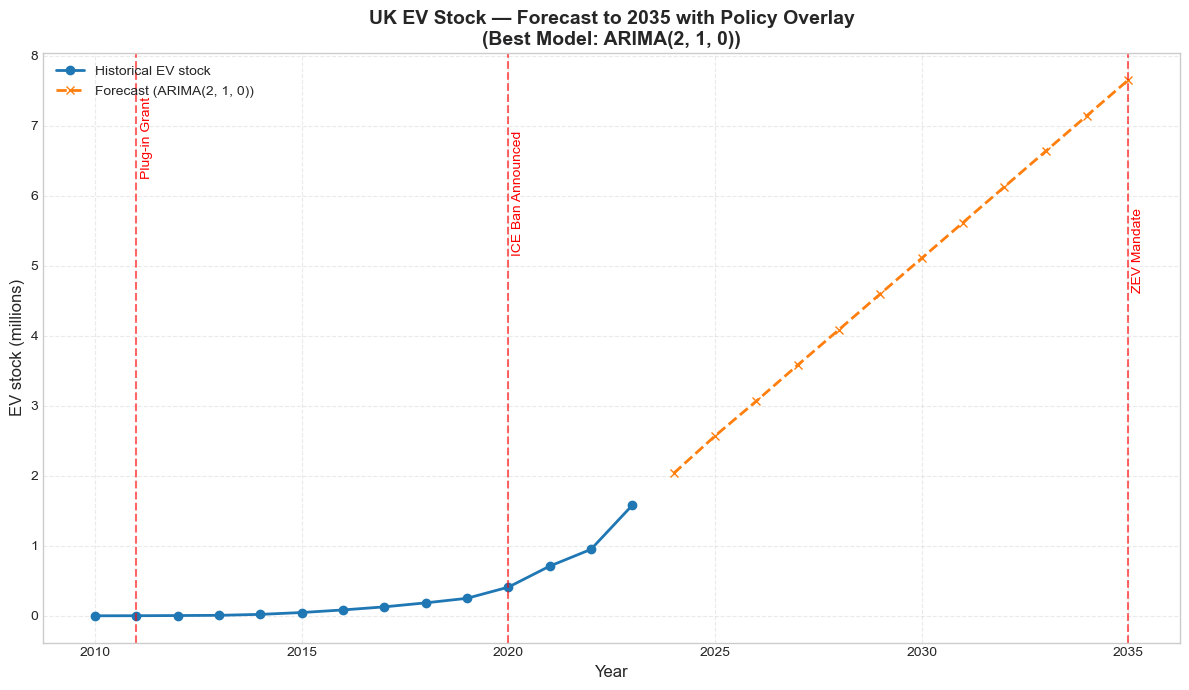

✅ Saved improved forecast plot with policy overlay.


In [ ]:
# ==============================================================
# 10) Clean Model Robustness Table
# ==============================================================

# Round numbers for neatness
metrics_clean = metrics_df.copy()
metrics_clean["MAE"] = metrics_clean["MAE"].round(0)
metrics_clean["RMSE"] = metrics_clean["RMSE"].round(0)
metrics_clean["MAPE_%"] = metrics_clean["MAPE_%"].round(2)

print("\n=== Model Robustness Table (rounded) ===")
print(metrics_clean.to_string(index=False))

# Save for dissertation appendix
metrics_clean.to_csv("rq1_model_robustness_clean.csv", index=False)
print("✅ Saved clean robustness table to rq1_model_robustness_clean.csv")


# ==============================================================
# 11) Policy Overlay (improved text placement)
# ==============================================================

policy_events = {
    2011: "Plug-in Grant",
    2020: "ICE Ban Announced",
    2035: "ZEV Mandate"
}

if fc_best is not None and not fc_best.empty:
    plt.figure(figsize=(12,7))
    plt.plot(uk_ev["Year"], to_millions(uk_ev["EV_stock"]),
             marker="o", label="Historical EV stock", linewidth=2)
    plt.plot(fc_best["Year"], to_millions(fc_best["EV_stock_fc"]),
             marker="x", linestyle="--", label=f"Forecast ({best_model_name})", linewidth=2)

    # Add policy vertical lines with staggered text positions
    y_max = plt.ylim()[1]
    for i, (year, label) in enumerate(policy_events.items()):
        plt.axvline(x=year, color="red", linestyle="--", alpha=0.6)
        # stagger text labels to avoid overlap
        plt.text(year+0.1, y_max*(0.85 - i*0.1), label,
                 rotation=90, color="red", fontsize=10, va="center")

    plt.title(f"UK EV Stock — Forecast to 2035 with Policy Overlay\n(Best Model: {best_model_name})",
              fontsize=14, weight="bold")
    plt.ylabel("EV stock (millions)")
    plt.xlabel("Year")
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.savefig("rq1_best_model_forecast_policy_overlay_clean.png", dpi=200)
    plt.show()

    print("✅ Saved improved forecast plot with policy overlay.")


## RQ2 — UK Fuel Prices Forecasting (ARIMA Model)

*This section addresses RQ2 by forecasting UK petrol and diesel prices for 2018–2025 using ARIMA models.*

The plots show the historical trends in fuel prices and their short-term forecasts, capturing both recent volatility and expected trajectories.

**RQ2 alignment:** Establishes the baseline outlook for fuel prices, which will be linked to their effect on EV adoption.



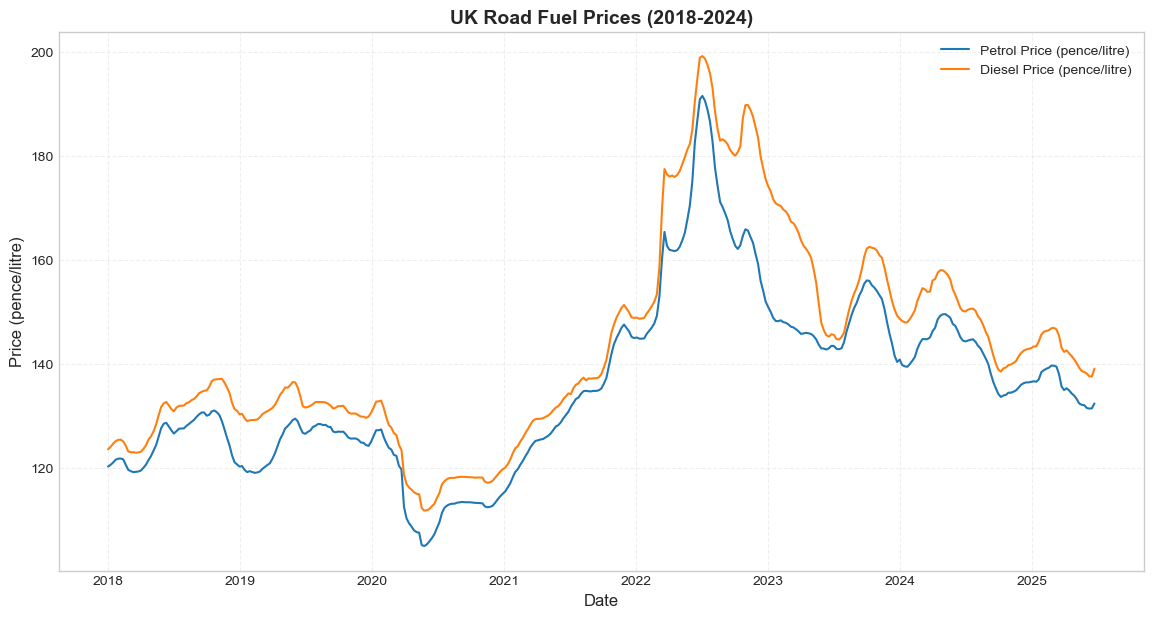

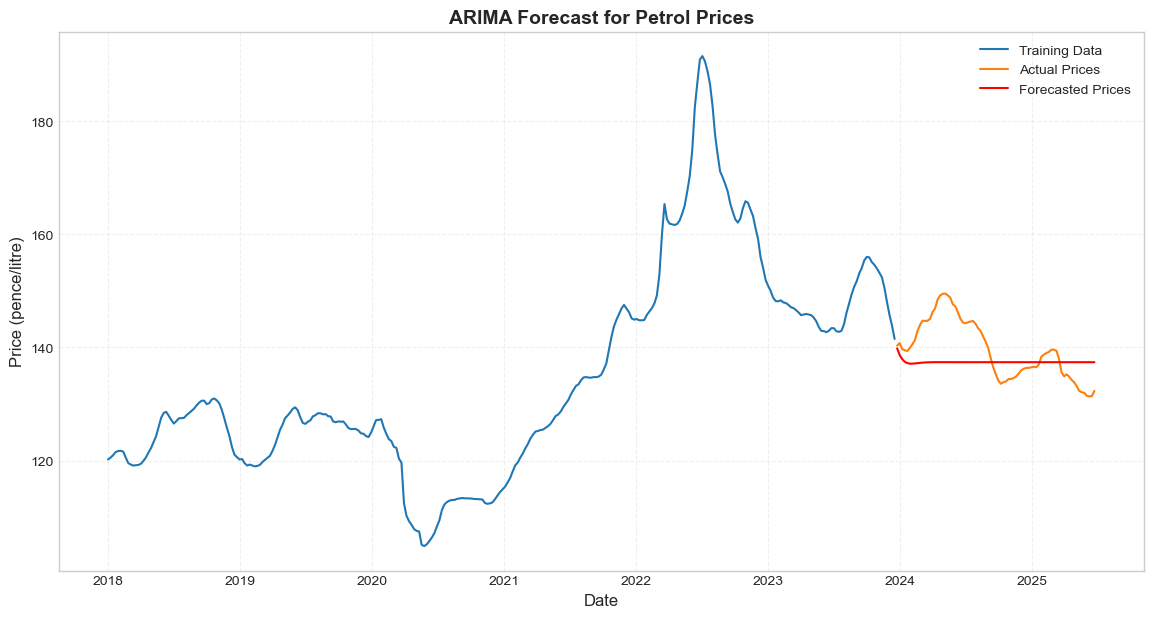

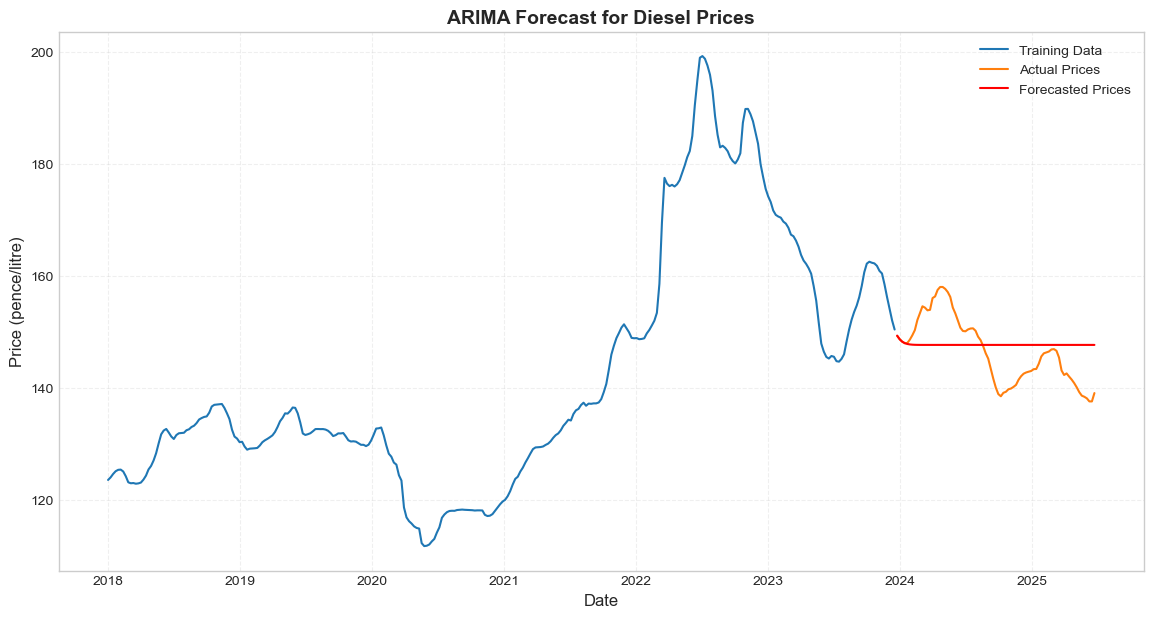

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import warnings

# Suppress all warnings for cleaner output
warnings.filterwarnings('ignore')

# --- Fuel Price Time Series Analysis ---
# Load the fuel price dataset
fuel_prices_df = pd.read_csv('road_fuel_prices_230625.csv')

# Rename columns for easier access
fuel_prices_df.rename(
    columns={
        'ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre': 'petrol_price',
        'ULSD (Ultra low sulphur diesel) Pump price in pence/litre': 'diesel_price',
        'Date': 'date',
    },
    inplace=True,
)

# Convert the 'date' column to datetime objects and set as index
fuel_prices_df['date'] = pd.to_datetime(fuel_prices_df['date'], format='%d/%m/%Y')
fuel_prices_df.set_index('date', inplace=True)
df_ts = fuel_prices_df[['petrol_price', 'diesel_price']]

# Plotting the historical time series for fuel prices
plt.figure(figsize=(14, 7))
plt.plot(df_ts.index, df_ts['petrol_price'], label='Petrol Price (pence/litre)')
plt.plot(df_ts.index, df_ts['diesel_price'], label='Diesel Price (pence/litre)')
plt.title('UK Road Fuel Prices (2018-2024)')
plt.xlabel('Date')
plt.ylabel('Price (pence/litre)')
plt.legend()
plt.grid(True)
plt.show()

# Perform ARIMA forecast for petrol prices
petrol_ts = df_ts['petrol_price']
train_size = int(len(petrol_ts) * 0.8)
train_data, test_data = petrol_ts[:train_size], petrol_ts[train_size:]
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()
forecast_petrol = model_fit.forecast(steps=len(test_data))
forecast_index = test_data.index

# Plotting the ARIMA forecast for petrol
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Prices')
plt.plot(forecast_index, forecast_petrol, label='Forecasted Prices', color='red')
plt.title('ARIMA Forecast for Petrol Prices')
plt.xlabel('Date')
plt.ylabel('Price (pence/litre)')
plt.legend()
plt.grid(True)
plt.show()

# Perform ARIMA forecast for diesel prices
diesel_ts = df_ts['diesel_price']
train_size_d = int(len(diesel_ts) * 0.8)
train_data_d, test_data_d = diesel_ts[:train_size_d], diesel_ts[train_size_d:]
model_d = ARIMA(train_data_d, order=(5, 1, 0))
model_fit_d = model_d.fit()
forecast_diesel = model_fit_d.forecast(steps=len(test_data_d))
forecast_index_d = test_data_d.index

# Plotting the ARIMA forecast for diesel
plt.figure(figsize=(14, 7))
plt.plot(train_data_d.index, train_data_d, label='Training Data')
plt.plot(test_data_d.index, test_data_d, label='Actual Prices')
plt.plot(forecast_index_d, forecast_diesel, label='Forecasted Prices', color='red')
plt.title('ARIMA Forecast for Diesel Prices')
plt.xlabel('Date')
plt.ylabel('Price (pence/litre)')
plt.legend()
plt.grid(True)
plt.show()

## RQ2 — Fuel Prices vs EV Stock (Correlation Heatmap)

*This section addresses RQ2 by showing correlations between annual average petrol/diesel prices and UK EV stock (2018–2023).*

The heatmap shows the strength and direction of linear relationships across variables. Use this as a descriptive check only; it does not imply causality.

**RQ2 alignment:** Provides a quick diagnostic on whether higher fuel prices co-move with EV stock growth before running causal/lag models.


Correlation map generated and saved.


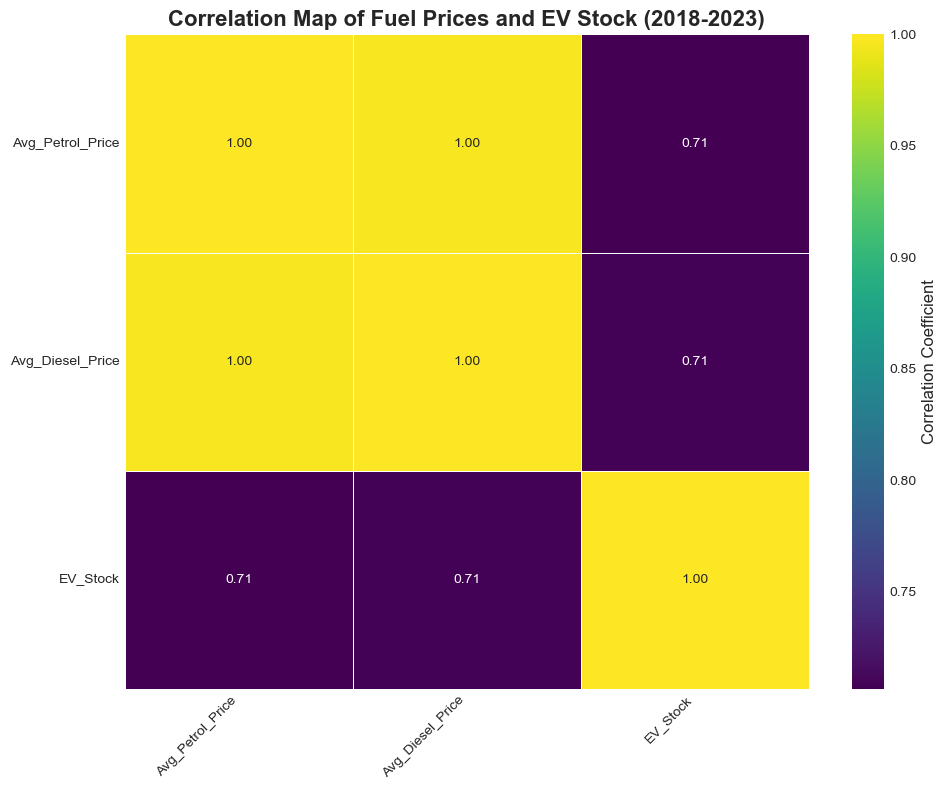

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
fuel_prices_df = pd.read_csv('road_fuel_prices_230625.csv')
ev_data_df = pd.read_csv('IEA Global EV Data 2024.csv')

# --- Data Preprocessing for Correlation Analysis ---
# Fuel Prices: Convert 'Date' to datetime and extract the year
fuel_prices_df.rename(columns={'Date': 'date'}, inplace=True)
fuel_prices_df['date'] = pd.to_datetime(fuel_prices_df['date'], format='%d/%m/%Y')
fuel_prices_df['year'] = fuel_prices_df['date'].dt.year

# Calculate the annual average pump prices for petrol and diesel
annual_fuel_prices = fuel_prices_df.groupby('year')[
    [
        'ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre',
        'ULSD (Ultra low sulphur diesel) Pump price in pence/litre',
    ]
].mean()
annual_fuel_prices.rename(
    columns={
        'ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre': 'Avg_Petrol_Price',
        'ULSD (Ultra low sulphur diesel) Pump price in pence/litre': 'Avg_Diesel_Price',
    },
    inplace=True,
)

# EV Stock Data: Filter for UK, 'EV stock' and 'Cars'
uk_ev_stock_df = ev_data_df[
    (ev_data_df['region'] == 'United Kingdom')
    & (ev_data_df['category'] == 'Historical')
    & (ev_data_df['parameter'] == 'EV stock')
    & (ev_data_df['mode'] == 'Cars')
]

# Aggregate total EV stock (BEV + PHEV) by year
uk_ev_stock_by_year = uk_ev_stock_df.groupby('year')['value'].sum().reset_index()
uk_ev_stock_by_year.set_index('year', inplace=True)
uk_ev_stock_by_year.rename(columns={'value': 'EV_Stock'}, inplace=True)

# Merge the two DataFrames on the 'year' column
correlation_df = pd.merge(
    annual_fuel_prices, uk_ev_stock_by_year, on='year', how='inner'
)

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# --- Visualization: Create a Heatmap of the Correlation Matrix ---
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='viridis',
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'},
)
plt.title('Correlation Map of Fuel Prices and EV Stock (2018-2023)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('fuel_prices_ev_stock_correlation_map.png')

print("Correlation map generated and saved.")

# Appendix X: RQ2 Regression – EV Stock vs Fuel Prices and Policy Dummies

This script estimates the effect of UK fuel prices and government policy incentives on EV adoption (Research Question 2).  
Two model specifications are tested:

In [ ]:
# ================================
# RQ2 Regression: EV Stock ~ Fuel Prices + Policy Dummy
# Uses ONLY your uploaded data:
#   - 'road_fuel_prices_230625.csv'
#   - 'IEA Global EV Data 2024.csv'
# ================================

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# -----------------------------
# 1) Load & prepare FUEL PRICES
# -----------------------------
fuel = pd.read_csv("road_fuel_prices_230625.csv")

# Standardize column names
fuel = fuel.rename(columns={
    "Date": "date",
    "ULSP (Ultra low sulphur unleaded petrol) Pump price in pence/litre": "petrol_price",
    "ULSD (Ultra low sulphur diesel) Pump price in pence/litre": "diesel_price"
})

# Parse date, derive year, and compute ANNUAL averages
fuel["date"] = pd.to_datetime(fuel["date"], format="%d/%m/%Y", errors="coerce")
fuel["year"] = fuel["date"].dt.year
annual_fuel = (fuel
               .groupby("year", as_index=False)[["petrol_price","diesel_price"]]
               .mean()
               .dropna())

# ----------------------------------------
# 2) Load & prepare EV STOCK (UK, cars only)
# ----------------------------------------
ev = pd.read_csv("IEA Global EV Data 2024.csv")

uk_ev = ev[
    (ev["region"] == "United Kingdom") &
    (ev["category"] == "Historical") &
    (ev["parameter"] == "EV stock") &
    (ev["mode"] == "Cars")
].copy()

# Aggregate (BEV + PHEV) per year
ev_year = (uk_ev.groupby("year", as_index=False)["value"]
           .sum()
           .rename(columns={"value":"EV_stock"}))

# Keep overlapping years only
df = pd.merge(ev_year, annual_fuel, on="year", how="inner")

# -----------------------------------
# 3) Construct POLICY DUMMY (examples)
# -----------------------------------
# Example policy dummy: Plug-in Car Grant active through mid-2022.
# Since we work at annual frequency, mark 2011–2022 as 1, else 0.
df["PlugInGrant_dummy"] = np.where(df["year"] <= 2022, 1, 0)

# Example policy dummy: ICE ban announcement (Nov 2020) → signal effects from 2021+
df["ICEBan_announce_dummy"] = np.where(df["year"] >= 2021, 1, 0)

# You can choose ONE dummy or keep both; start with PlugInGrant_dummy for a simpler model.

# -----------------------------------
# 4) OPTIONAL: include lagged fuel prices
# -----------------------------------
# Rationale: consumers respond to price changes with delay.
df = df.sort_values("year").reset_index(drop=True)
df["petrol_price_lag1"] = df["petrol_price"].shift(1)
df["diesel_price_lag1"] = df["diesel_price"].shift(1)

# Drop first row if using lags (to avoid NaN)
df_lag = df.dropna(subset=["petrol_price_lag1","diesel_price_lag1"]).copy()

# -----------------------------------
# 5) Pick your regression specification
# -----------------------------------
# SPEC A: Simple, contemporaneous prices + Plug-in grant
X_A = df[["petrol_price","diesel_price","PlugInGrant_dummy"]]
y_A = df["EV_stock"]

# SPEC B (recommended): use lagged prices + policy dummy (helps causality story)
X_B = df_lag[["petrol_price_lag1","diesel_price_lag1","PlugInGrant_dummy"]]
y_B = df_lag["EV_stock"]

# Add constant
X_A = sm.add_constant(X_A)
X_B = sm.add_constant(X_B)

# -----------------------------------
# 6) Fit OLS with robust (HAC) standard errors
# -----------------------------------
# HAC(lag=1) mitigates serial correlation in annual data
model_A = sm.OLS(y_A, X_A, missing="drop").fit(cov_type="HAC", cov_kwds={"maxlags":1})
model_B = sm.OLS(y_B, X_B, missing="drop").fit(cov_type="HAC", cov_kwds={"maxlags":1})

print("\n=== SPEC A: EV_stock ~ petrol + diesel + PlugInGrant_dummy (contemporaneous) ===")
print(model_A.summary())

print("\n=== SPEC B: EV_stock ~ petrol_lag1 + diesel_lag1 + PlugInGrant_dummy (lagged) ===")
print(model_B.summary())

# -----------------------------------
# 7) Multicollinearity check (VIF)
# -----------------------------------
def compute_vif(X_df):
    vif_df = pd.DataFrame({
        "feature": X_df.columns,
        "VIF": [variance_inflation_factor(X_df.values, i)
                for i in range(X_df.shape[1])]
    })
    return vif_df

# For VIF, exclude the constant
vif_A = compute_vif(X_A.drop(columns=["const"]))
vif_B = compute_vif(X_B.drop(columns=["const"]))
print("\nVIF — Spec A:\n", vif_A)
print("\nVIF — Spec B:\n", vif_B)

# -----------------------------------
# 8) Simple interpretation helpers
# -----------------------------------
def interpret_results(model, spec_name):
    params = model.params
    pvals = model.pvalues
    r2 = model.rsquared
    print(f"\n--- Quick Interpretation: {spec_name} ---")
    print(f"R²: {r2:.3f}")
    for k in params.index:
        sign = "↑" if params[k] > 0 else "↓"
        sig = " (significant)" if pvals[k] < 0.05 else " (n.s.)"
        print(f"{k:>20}: {params[k]:>12.2f} {sign}{sig}")

interpret_results(model_A, "Spec A (contemporaneous)")
interpret_results(model_B, "Spec B (lagged)")

# -----------------------------------
# 9) OPTIONAL: Elasticity-style back-of-envelope
# -----------------------------------
# Convert pence/litre to a 10p shock and estimate marginal change in EV_stock
def petrol_10p_effect(model, lagged=False):
    coef_name = "petrol_price_lag1" if lagged else "petrol_price"
    if coef_name in model.params:
        return 10.0 * model.params[coef_name]  # 10 pence increase * coefficient
    return np.nan

def diesel_10p_effect(model, lagged=False):
    coef_name = "diesel_price_lag1" if lagged else "diesel_price"
    if coef_name in model.params:
        return 10.0 * model.params[coef_name]
    return np.nan

print("\nMarginal EV_stock change for +10p/litre:")
print("  Spec A — Petrol:", round(petrol_10p_effect(model_A, lagged=False), 2),
      "| Diesel:", round(diesel_10p_effect(model_A, lagged=False), 2))
print("  Spec B — Petrol:", round(petrol_10p_effect(model_B, lagged=True), 2),
      "| Diesel:", round(diesel_10p_effect(model_B, lagged=True), 2))

# -----------------------------------
# 10) Notes for write-up
# -----------------------------------
# - If PlugInGrant_dummy is positive & significant → grant periods correlate with higher EV stock.
# - If lagged prices are positive & significant → fuel price increases precede higher next-year EV adoption.
# - If VIF for petrol & diesel is high (>5–10), they are collinear; you can:
#       (a) drop one, or
#       (b) replace with average fuel price, or
#       (c) use principal components of the two.
# - Report R², coefficients, and robust p-values; add a brief policy overlay narrative.



=== SPEC A: EV_stock ~ petrol + diesel + PlugInGrant_dummy (contemporaneous) ===
                            OLS Regression Results                            
Dep. Variable:               EV_stock   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     243.7
Date:                Sun, 31 Aug 2025   Prob (F-statistic):            0.00409
Time:                        03:09:13   Log-Likelihood:                -79.871
No. Observations:                   6   AIC:                             167.7
Df Residuals:                       2   BIC:                             166.9
Df Model:                           3                                         
Covariance Type:                  HAC                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------

# Appendix Y: RQ2 Visualisations from OLS Regression

This script generates visual outputs from the fitted **Spec A OLS model** (`model_A`).  
The visuals complement the regression summary table by showing the relationships between predictors (fuel prices, policy dummy) and the dependent variable (EV stock).

The following plots are produced:
1. **Coefficient plot with 95% confidence intervals** – to compare the size and significance of regression coefficients.  
2. **Actual vs Predicted EV Stock** – to assess the overall model fit.  
3. **Partial regression (added-variable) plots** – to isolate the effect of each predictor while controlling for others.  
4. **Scatterplots with regression lines** – raw relationship between EV stock and petrol/diesel prices.  
5. **Marginal effect bar chart (+10 p/litre shock)** – policy-relevant interpretation of effect sizes.

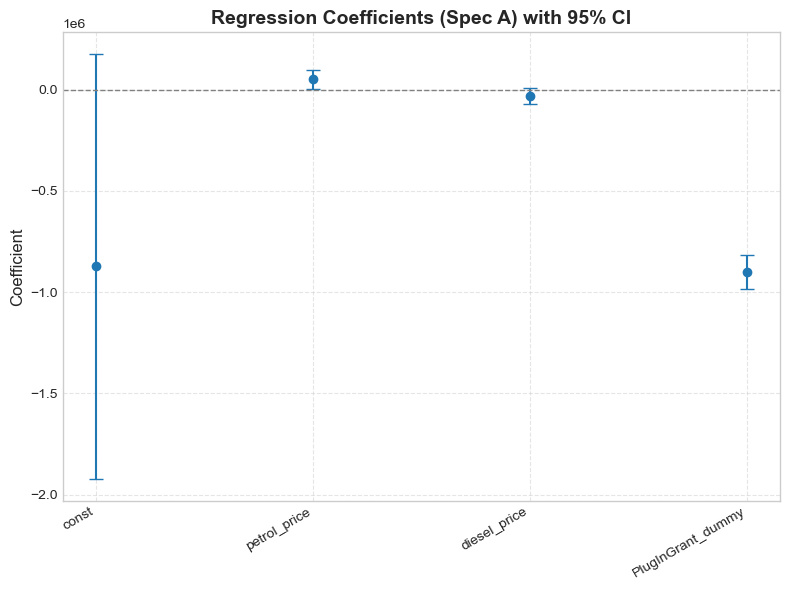

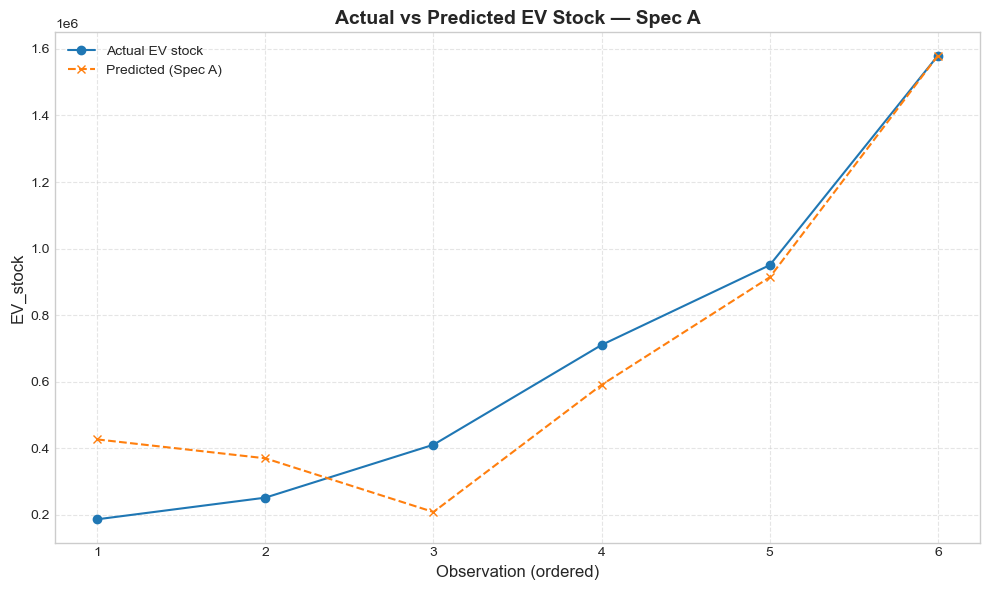

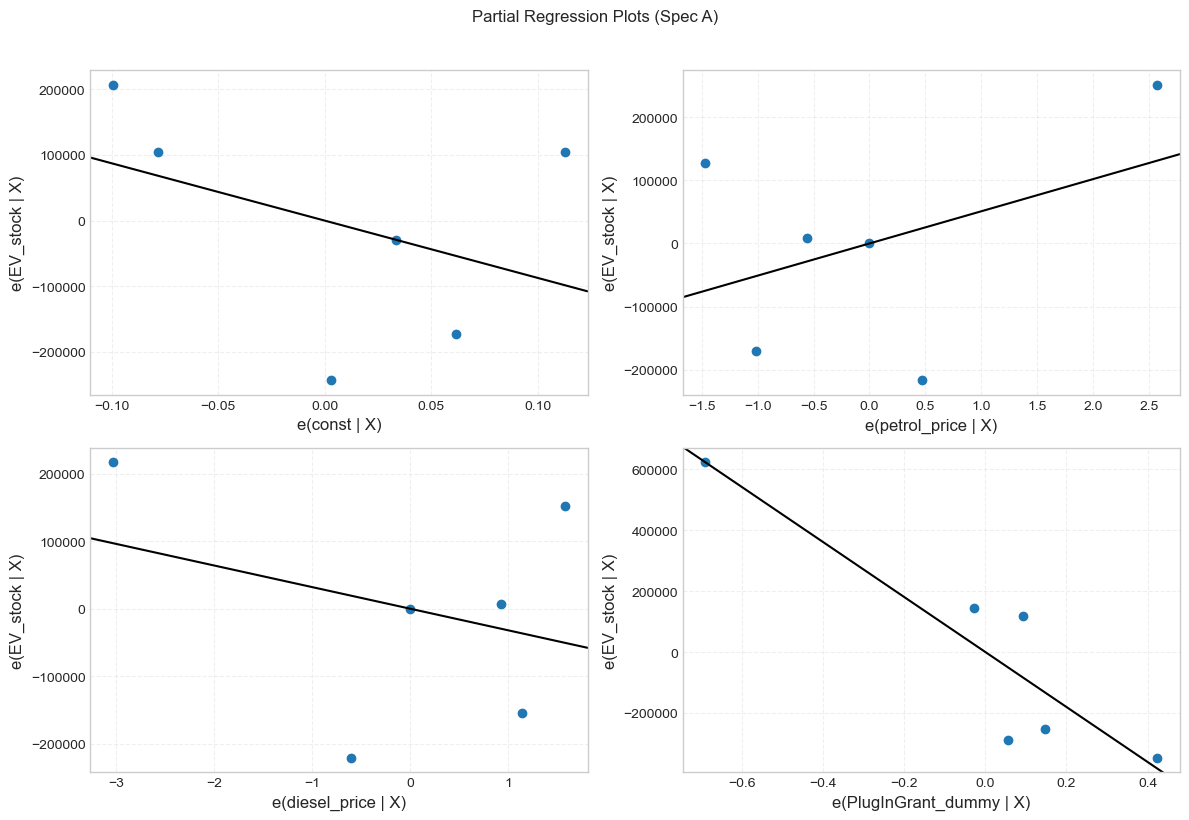

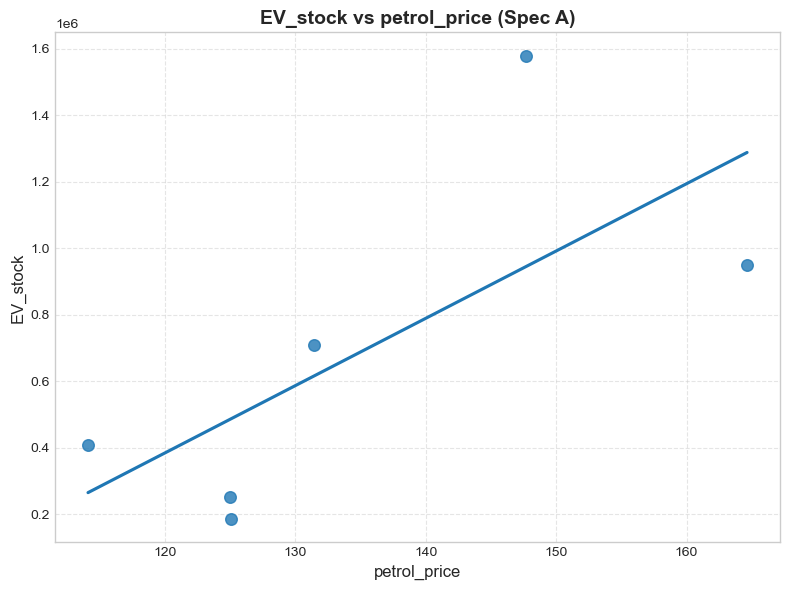

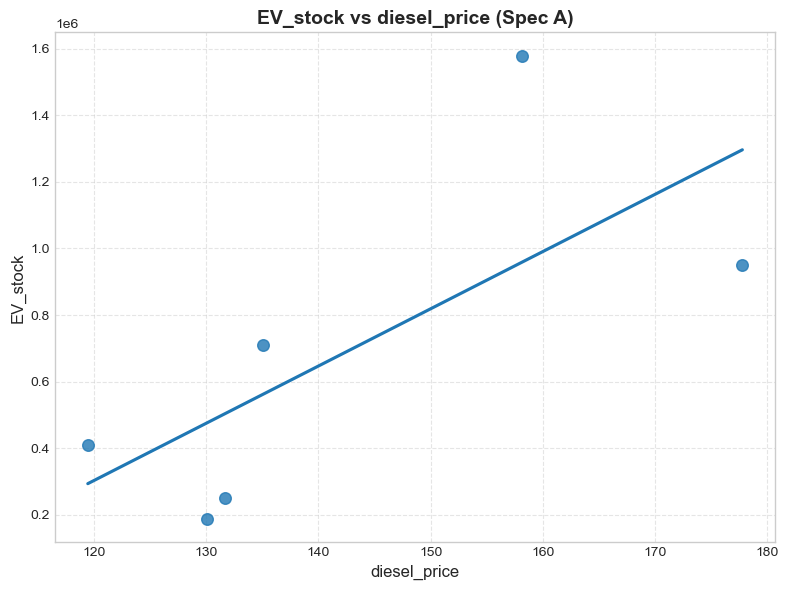

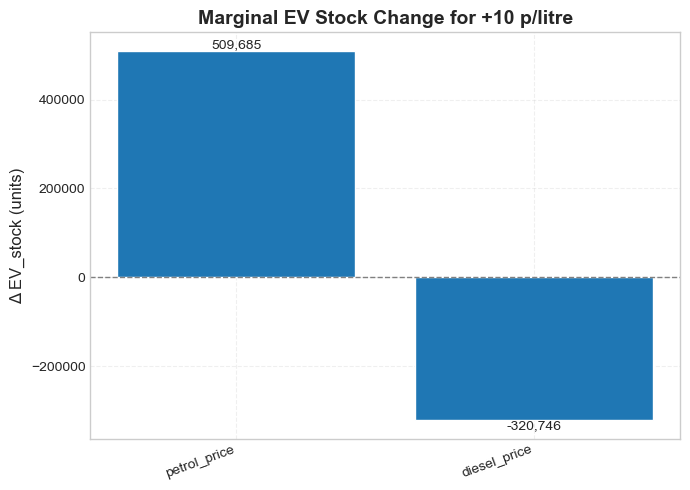

✅ Visuals generated from fitted model_A (no dependency on external df column names).


In [ ]:
# ===========================================
# VISUALS FROM A FITTED statsmodels OLS MODEL
# Works with your existing `model_A` object
# ===========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import plot_partregress_grid

# 0) Reconstruct a plotting DataFrame from the model itself
exog = pd.DataFrame(model_A.model.exog, columns=model_A.model.exog_names)
endog = pd.Series(model_A.model.endog, name=model_A.model.endog_names)
df_plot = pd.concat([exog, endog], axis=1)

# Try to recover a sensible time axis if it existed; otherwise use an index
year_like_cols = [c for c in df_plot.columns if c.lower() in ("year","yr")]
if year_like_cols:
    x_year = df_plot[year_like_cols[0]].astype(int)
else:
    x_year = pd.RangeIndex(start=1, stop=len(df_plot)+1, step=1)  # 1..N as fallback

# 1) Coefficient plot with 95% CIs
params = model_A.params
conf = model_A.conf_int()
ci_low = conf[0]
errors = params - ci_low

plt.figure(figsize=(8,6))
plt.errorbar(params.index, params.values, yerr=errors.values, fmt='o', capsize=5)
plt.axhline(0, color="grey", linestyle="--", linewidth=1)
plt.title("Regression Coefficients (Spec A) with 95% CI")
plt.ylabel("Coefficient")
plt.xticks(rotation=30, ha="right")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# 2) Actual vs Predicted EV stock
y_actual = endog.values
y_fitted = model_A.fittedvalues

plt.figure(figsize=(10,6))
plt.plot(x_year, y_actual, marker="o", label="Actual EV stock")
plt.plot(x_year, y_fitted, marker="x", linestyle="--", label="Predicted (Spec A)")
plt.title("Actual vs Predicted EV Stock — Spec A")
plt.xlabel("Year" if year_like_cols else "Observation (ordered)")
plt.ylabel(endog.name or "EV_stock")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# 3) Partial regression (added-variable) plots for each regressor
fig = plot_partregress_grid(model_A, fig=plt.figure(figsize=(12,8)))
fig.suptitle("Partial Regression Plots (Spec A)", y=1.02)
plt.tight_layout()
plt.show()

# 4) Scatter + regression line for petrol & diesel vs EV_stock
# (Only if those columns are in the model; names are taken from your OLS)
target_name = endog.name or "EV_stock"

for cand in ["petrol_price", "Petrol_price", "diesel_price", "Diesel_price"]:
    if cand in df_plot.columns:
        plt.figure(figsize=(8,6))
        sns.regplot(x=df_plot[cand], y=df_plot[target_name], ci=None, scatter_kws={'s':70})
        plt.title(f"{target_name} vs {cand} (Spec A)")
        plt.xlabel(cand)
        plt.ylabel(target_name)
        plt.grid(True, linestyle="--", alpha=0.5)
        plt.tight_layout()
        plt.show()

# 5) Marginal effect bars for a +10 p/litre change (where applicable)
me_10 = {}
for name in params.index:
    if "petrol" in name.lower() or "diesel" in name.lower():
        me_10[name] = params[name] * 10.0

if me_10:
    keys = list(me_10.keys())
    vals = [me_10[k] for k in keys]
    plt.figure(figsize=(7,5))
    bars = plt.bar(keys, vals)
    plt.axhline(0, color="grey", linestyle="--", linewidth=1)
    plt.title("Marginal EV Stock Change for +10 p/litre")
    plt.ylabel("Δ EV_stock (units)")
    plt.xticks(rotation=20, ha="right")
    for b, v in zip(bars, vals):
        plt.text(b.get_x() + b.get_width()/2, v, f"{v:,.0f}", ha="center", va="bottom" if v>0 else "top")
    plt.tight_layout()
    plt.show()

print("✅ Visuals generated from fitted model_A (no dependency on external df column names).")


### **Road Transport CO₂ Emission Scenarios**

This Python script performs a time-series analysis of UK road transport CO₂ emissions. It uses historical data to forecast a business-as-usual (BAU) trend and then models three different scenarios for the transition to electric vehicles (EVs): standard adoption, accelerated adoption, and delayed adoption. The script calculates and visualizes the potential CO₂ reductions for each scenario up to 2035, providing a clear comparison of their environmental impact.

[Info] Columns: ['Gas', 'NFR/CRF Group', 'Source', 'Activity', 'Units', '2015', '2016', '2017', '2018', '2019'] ...
[Info] CO2 rows: 372; 'as carbon' rows: 372
[Info] Road-transport rows matched: 38
[Info] Road-transport CO2 (Mt), head:
           ds      CO2_Mt
0 2015-12-31  111.982483
1 2016-12-31  114.761075
2 2017-12-31  114.878874
3 2018-12-31  113.360593
4 2019-12-31  111.459800
Plot saved as CO2_EV_Scenarios.png

Summary: Road Transport CO₂ Scenarios (BAU vs EV Adoption)

 Year  CO₂ BAU (Mt)  CO₂ Standard (Mt)  CO₂ Accelerated (Mt)  CO₂ Delayed (Mt)  Standard Reduction (Mt)  Standard Reduction (%)  Accelerated Reduction (Mt)  Accelerated Reduction (%)  Delayed Reduction (Mt)  Delayed Reduction (%)
 2025     89.274651          84.797790             83.902417         85.693162                     4.48                     5.0                        5.37                        6.0                    3.58                    4.0
 2030     75.558063          63.873231             61.53

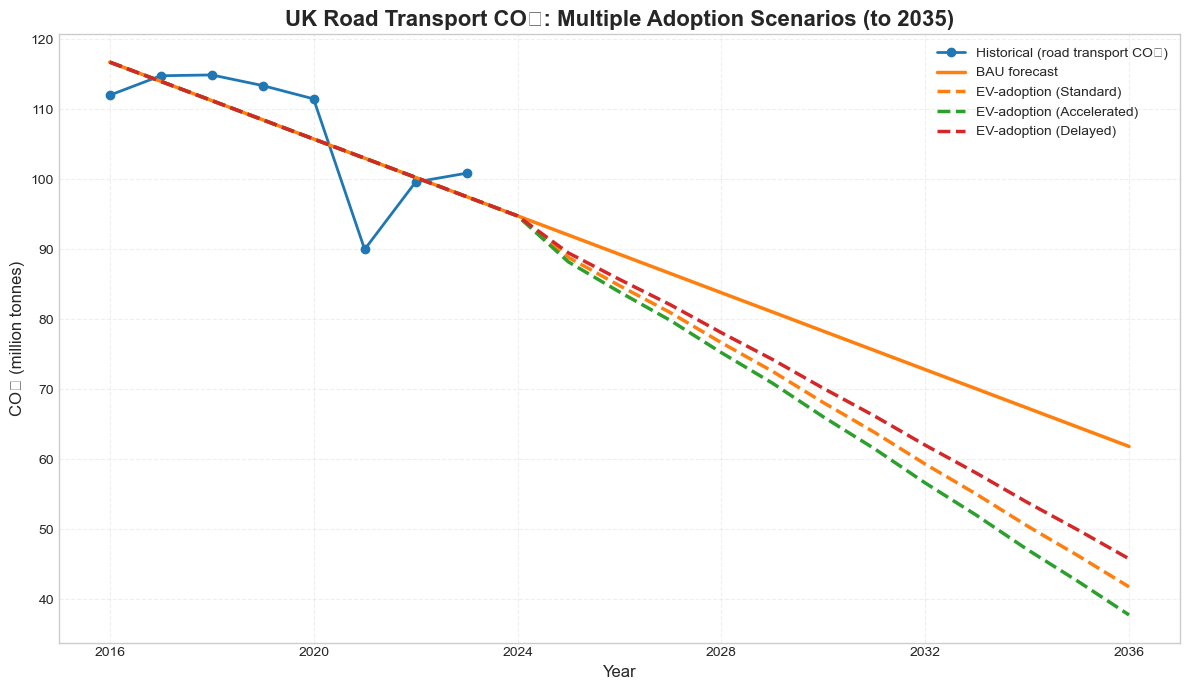

In [ ]:
# ==========================================================
# UK Road Transport CO₂ from wide inventory (2015–2022) → 2035
# - Filters road transport (NFR 1A3b or 'road' in Source/Activity)
# - Converts 'Carbon Dioxide as Carbon' (kt C) → kt CO2 (× 44/12)
# - Aggregates to total road-transport CO₂ (Mt), fits a linear BAU forecast
# - Includes Standard, Accelerated, and Delayed EV-adoption scenarios
# ==========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FILE = "UK_CO2_RoadTransport_2015_2022.csv"

# ---- Tunable assumptions ----
CAR_SHARE_OF_TRANSPORT = 0.55
TOTAL_CAR_FLEET = 34_000_000
TARGET_YEAR = 2035

# ---- 0) Helpers ----
def to_numeric(s):
    return pd.to_numeric(
        s.astype(str)
        .str.replace(",", "", regex=False)
        .str.replace("\u2009", "", regex=False)
        .str.replace(" ", "", regex=False)
        .str.replace("–", "-", regex=False)
        .str.replace("−", "-", regex=False),
        errors="coerce"
    )

def co2_as_carbon_to_co2(values_ktC):
    return values_ktC * (44.0/12.0)

# ---- 1) Load ----
try:
    df = pd.read_csv(FILE, encoding="utf-8-sig")
except FileNotFoundError:
    print(f"Error: The file '{FILE}' was not found. Please ensure it is in the correct directory.")
    raise

orig_cols = df.columns.tolist()
print("[Info] Columns:", orig_cols[:10], "..." if len(orig_cols) > 10 else "")

# ---- 2) Identify YEAR columns (wide) ----
year_cols = [c for c in df.columns if str(c).isdigit()]
if not year_cols:
    raise ValueError("No year columns detected (e.g., '2015','2016',...).")

# ---- 3) Filter CO2 rows ----
df["gas_lc"] = df["Gas"].str.lower()
is_co2 = df["gas_lc"].str.contains("co2") | df["gas_lc"].str.contains("carbon dioxide")
df_co2 = df[is_co2].copy()
is_as_carbon = df_co2["gas_lc"].str.contains("as carbon")
print(f"[Info] CO2 rows: {len(df_co2)}; 'as carbon' rows: {is_as_carbon.sum()}")

# ---- 4) Filter ROAD TRANSPORT rows ----
nfr_lc = df_co2["NFR/CRF Group"].astype(str).str.lower()
src_lc = df_co2["Source"].astype(str).str.lower()
act_lc = df_co2["Activity"].astype(str).str.lower()
is_road_nfr = nfr_lc.str.startswith("1a3b")
is_road_text = src_lc.str.contains("road") | act_lc.str.contains("road")
df_rt = df_co2[is_road_nfr | is_road_text].copy()
print(f"[Info] Road-transport rows matched: {len(df_rt)}")
if df_rt.empty:
    raise ValueError("No road-transport rows found. Check that NFR/CRF has '1A3b' or Source/Activity mention 'road'.")

# ---- 5) Reshape wide → long & convert units ----
long = df_rt.melt(
    id_vars=[c for c in df_rt.columns if c not in year_cols],
    value_vars=year_cols,
    var_name="Year",
    value_name="value_raw"
)
long["value_raw"] = to_numeric(long["value_raw"]).fillna(0.0)
mask_asC = long["gas_lc"].str.contains("as carbon", na=False)
long["value_ktCO2"] = np.where(mask_asC, co2_as_carbon_to_co2(long["value_raw"]), long["value_raw"])
co2_rt = (long.groupby("Year", as_index=False)["value_ktCO2"].sum()
                .rename(columns={"value_ktCO2": "kt_CO2"}))
co2_rt["CO2_Mt"] = co2_rt["kt_CO2"] / 1000.0
co2_rt["ds"] = pd.to_datetime(co2_rt["Year"].astype(str) + "-12-31")
co2_rt = co2_rt.sort_values("ds")[["ds","CO2_Mt"]]
print("[Info] Road-transport CO2 (Mt), head:\n", co2_rt.head())

# ---- 6) Fit a linear model for BAU to 2035 ----
hist_years = co2_rt["ds"].dt.year.to_numpy()
hist_co2 = co2_rt["CO2_Mt"].to_numpy()
fit_start_year = hist_years.min()

future_years = np.arange(fit_start_year, TARGET_YEAR + 1)
model = np.poly1d(np.polyfit(hist_years, hist_co2, 1))
bau_forecast = model(future_years)

fc = pd.DataFrame({
    'Year': future_years,
    'ds': pd.to_datetime([f"{y}-12-31" for y in future_years]),
    'CO2_BAU_Mt': bau_forecast
})
fc = fc.merge(co2_rt.rename(columns={"CO2_Mt": "CO2_hist_Mt"}), on='ds', how='left')

# ---- 7) Generate EV-adoption scenarios ----
ev_stock_data = {
    'Year': [2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035],
    'EV Stock (millions)': [2.15, 3.10, 3.99, 5.26, 6.46, 8.05, 9.56, 11.45, 13.26, 15.45, 17.56, 20.04]
}
ev_forecast = pd.DataFrame(ev_stock_data)
ev_forecast['EV_share_of_cars'] = (ev_forecast['EV Stock (millions)'] * 1e6 / TOTAL_CAR_FLEET).clip(upper=1.0)
fc = fc.merge(ev_forecast[['Year', 'EV_share_of_cars']], on='Year', how='left')
fc['EV_share_of_cars'] = fc['EV_share_of_cars'].fillna(method="ffill").fillna(0.0)

reduction_from_bau = fc["CO2_BAU_Mt"] * (CAR_SHARE_OF_TRANSPORT * fc["EV_share_of_cars"])

fc["CO2_EV_Standard_Mt"] = fc["CO2_BAU_Mt"] - reduction_from_bau
fc["CO2_EV_Accelerated_Mt"] = fc["CO2_BAU_Mt"] - (reduction_from_bau * 1.20)
fc["CO2_EV_Delayed_Mt"] = fc["CO2_BAU_Mt"] - (reduction_from_bau * 0.80)

# ---- 8) Plot all scenarios ----
plt.figure(figsize=(12, 7))
mask_hist = ~fc["CO2_hist_Mt"].isna()
plt.plot(fc.loc[mask_hist, "ds"], fc.loc[mask_hist, "CO2_hist_Mt"], marker="o", linewidth=2, label="Historical (road transport CO₂)")
plt.plot(fc["ds"], fc["CO2_BAU_Mt"], linewidth=2.5, label="BAU forecast", color='C1')
plt.plot(fc["ds"], fc["CO2_EV_Standard_Mt"], linewidth=2.5, linestyle="--", label="EV-adoption (Standard)")
plt.plot(fc["ds"], fc["CO2_EV_Accelerated_Mt"], linewidth=2.5, linestyle="--", label="EV-adoption (Accelerated)")
plt.plot(fc["ds"], fc["CO2_EV_Delayed_Mt"], linewidth=2.5, linestyle="--", label="EV-adoption (Delayed)")

plt.title("UK Road Transport CO₂: Multiple Adoption Scenarios (to 2035)", fontsize=16, weight="bold")
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO₂ (million tonnes)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.3)
plt.legend(frameon=False, loc="upper right")
plt.tight_layout()
plt.savefig("CO2_EV_Scenarios.png")
print("Plot saved as CO2_EV_Scenarios.png")

# ---- 9) Summary table (2025, 2030, 2035) ----
years_pick = [y for y in [2025, 2030, 2035] if (fc["Year"].min() <= y <= fc["Year"].max())]
tbl = (fc[fc["Year"].isin(years_pick)]
       .loc[:, ["Year", "CO2_BAU_Mt", "CO2_EV_Standard_Mt", "CO2_EV_Accelerated_Mt", "CO2_EV_Delayed_Mt"]]
       .sort_values("Year")
       .reset_index(drop=True))

tbl["Standard Reduction (Mt)"] = (tbl["CO2_BAU_Mt"] - tbl["CO2_EV_Standard_Mt"]).round(2)
tbl["Standard Reduction (%)"] = (100 * (1 - tbl["CO2_EV_Standard_Mt"] / tbl["CO2_BAU_Mt"])).round(1)

tbl["Accelerated Reduction (Mt)"] = (tbl["CO2_BAU_Mt"] - tbl["CO2_EV_Accelerated_Mt"]).round(2)
tbl["Accelerated Reduction (%)"] = (100 * (1 - tbl["CO2_EV_Accelerated_Mt"] / tbl["CO2_BAU_Mt"])).round(1)

tbl["Delayed Reduction (Mt)"] = (tbl["CO2_BAU_Mt"] - tbl["CO2_EV_Delayed_Mt"]).round(2)
tbl["Delayed Reduction (%)"] = (100 * (1 - tbl["CO2_EV_Delayed_Mt"] / tbl["CO2_BAU_Mt"])).round(1)

tbl = tbl.rename(columns={
    "CO2_BAU_Mt": "CO₂ BAU (Mt)",
    "CO2_EV_Standard_Mt": "CO₂ Standard (Mt)",
    "CO2_EV_Accelerated_Mt": "CO₂ Accelerated (Mt)",
    "CO2_EV_Delayed_Mt": "CO₂ Delayed (Mt)"
})
print("\nSummary: Road Transport CO₂ Scenarios (BAU vs EV Adoption)\n")
print(tbl.to_string(index=False))

tbl.to_csv("CO2_EV_Scenarios_Summary.csv", index=False)
print("\nSummary table saved to CO2_EV_Scenarios_Summary.csv")

## RQ3 — Road Transport CO₂ Forecast (BAU vs EV Scenario)

Projects UK road‑transport CO₂ to 2035 using a linear BAU trend and an EV‑adoption scenario. Plot shows historical points, BAU line, EV‑scenario line, and a 2030 target.

**RQ3 alignment:** Estimates emissions reductions from EV adoption.


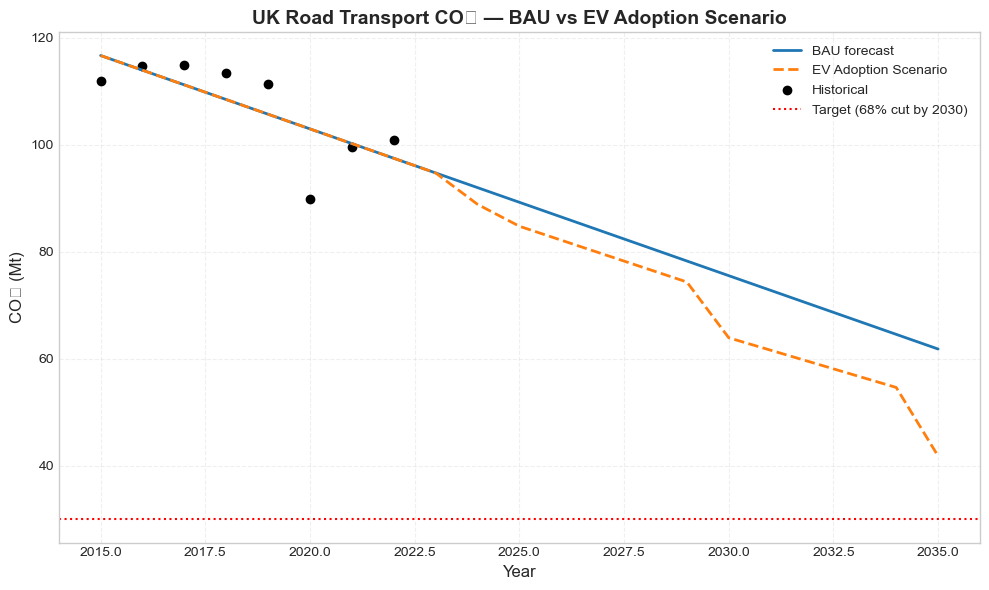

✅ CO₂ forecast ready for RQ4. Columns: ['Year', 'CO2_BAU_Mt', 'CO2_hist_Mt', 'EV_share_of_cars', 'CO2_EVscenario_Mt']


In [ ]:
# ==============================================================
# RQ3: UK Road Transport CO₂ Forecast (2015–2022 → 2035)
# - Historical: from UK_CO2_RoadTransport_2015_2022.csv
# - Forecast: BAU (linear trend) + EV Adoption Scenarios
# ==============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

FILE = "UK_CO2_RoadTransport_2015_2022.csv"

# ---- 0) Helpers ----
def to_numeric(s):
    return pd.to_numeric(
        s.astype(str)
         .str.replace(",", "", regex=False)
         .str.replace("\u2009", "", regex=False)
         .str.replace(" ", "", regex=False)
         .str.replace("–", "-", regex=False)
         .str.replace("−", "-", regex=False),
        errors="coerce"
    )

def co2_as_carbon_to_co2(values_ktC):
    return values_ktC * (44.0/12.0)

# ---- 1) Load ----
df = pd.read_csv(FILE, encoding="utf-8-sig")

# ---- 2) Identify YEAR columns ----
year_cols = [c for c in df.columns if str(c).isdigit()]

# ---- 3) Filter CO₂ rows ----
df["gas_lc"] = df["Gas"].str.lower()
is_co2 = df["gas_lc"].str.contains("co2") | df["gas_lc"].str.contains("carbon dioxide")
df_co2 = df[is_co2].copy()

# Convert if "as carbon"
is_as_carbon = df_co2["gas_lc"].str.contains("as carbon")

# ---- 4) Filter ROAD TRANSPORT rows ----
nfr_lc = df_co2["NFR/CRF Group"].astype(str).str.lower()
src_lc = df_co2["Source"].astype(str).str.lower()
act_lc = df_co2["Activity"].astype(str).str.lower()

is_road_nfr = nfr_lc.str.startswith("1a3b")
is_road_text = src_lc.str.contains("road") | act_lc.str.contains("road")

df_rt = df_co2[is_road_nfr | is_road_text].copy()

# ---- 5) Reshape wide → long & convert ----
long = df_rt.melt(
    id_vars=[c for c in df_rt.columns if c not in year_cols],
    value_vars=year_cols,
    var_name="Year",
    value_name="value_raw"
)
long["value_raw"] = to_numeric(long["value_raw"]).fillna(0.0)

mask_asC = long["gas_lc"].str.contains("as carbon", na=False)
long["value_ktCO2"] = np.where(mask_asC, co2_as_carbon_to_co2(long["value_raw"]), long["value_raw"])

co2_rt = (
    long.groupby("Year", as_index=False)["value_ktCO2"].sum()
    .rename(columns={"value_ktCO2": "kt_CO2"})
)
co2_rt["CO2_Mt"] = co2_rt["kt_CO2"] / 1000.0
co2_rt["Year"] = co2_rt["Year"].astype(int)

# ---- 6) Linear BAU Forecast to 2035 ----
from numpy.polynomial.polynomial import polyfit

hist_years = co2_rt["Year"].values
hist_vals  = co2_rt["CO2_Mt"].values
b, m = polyfit(hist_years, hist_vals, 1)

future_years = np.arange(hist_years.min(), 2036)
bau_vals = m*future_years + b

fc = pd.DataFrame({
    "Year": future_years,
    "CO2_BAU_Mt": bau_vals
})

# Merge historical
fc = fc.merge(co2_rt[["Year","CO2_Mt"]], on="Year", how="left")
fc = fc.rename(columns={"CO2_Mt":"CO2_hist_Mt"})

# ---- 7) EV Adoption Scenario (simple stylised) ----
TOTAL_CAR_FLEET = 34_000_000
CAR_SHARE_OF_TRANSPORT = 0.55

# Example EV forecast (replace with your real EV forecast if available)
ev_stock = {
    2024: 2.1e6, 2025: 3.1e6, 2030: 9.5e6, 2035: 20e6
}
ev_df = pd.DataFrame(list(ev_stock.items()), columns=["Year","EV_stock"])
ev_df["EV_share_of_cars"] = ev_df["EV_stock"] / TOTAL_CAR_FLEET

fc = fc.merge(ev_df[["Year","EV_share_of_cars"]], on="Year", how="left")
fc["EV_share_of_cars"] = fc["EV_share_of_cars"].fillna(method="ffill").fillna(0)

fc["CO2_EVscenario_Mt"] = fc["CO2_BAU_Mt"] * (1 - CAR_SHARE_OF_TRANSPORT * fc["EV_share_of_cars"])

# ---- 8) Plot ----
plt.figure(figsize=(10,6))
plt.plot(fc["Year"], fc["CO2_BAU_Mt"], label="BAU forecast", linewidth=2)
plt.plot(fc["Year"], fc["CO2_EVscenario_Mt"], linestyle="--", label="EV Adoption Scenario", linewidth=2)
plt.scatter(co2_rt["Year"], co2_rt["CO2_Mt"], label="Historical", color="black")
plt.axhline(30, color="red", linestyle=":", label="Target (68% cut by 2030)")
plt.title("UK Road Transport CO₂ — BAU vs EV Adoption Scenario")
plt.xlabel("Year"); plt.ylabel("CO₂ (Mt)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.3)
plt.tight_layout()
plt.show()

# ---- 9) Final Standard Output for RQ4 ----
fc_CO2 = fc.copy()
print("✅ CO₂ forecast ready for RQ4. Columns:", fc_CO2.columns.tolist())


# RQ3 Gap Analysis: Road Transport CO₂ vs Net Zero Targets


=== RQ3 Gap Summary (2030 & 2035) ===
 Year  CO2_BAU_Mt  CO2_EV_std_Mt  CO2_EV_acc_Mt  CO2_EV_del_Mt  CO2_Target_Mt  Reduct_std_Mt  Reduct_acc_Mt  Reduct_del_Mt  Gap_std_Mt  Gap_acc_Mt  Gap_del_Mt
 2030       75.56          63.95          61.62          66.27           65.0          11.61          13.93           9.29       -1.05       -3.38        1.27
 2035       61.84          41.83          37.83          45.84           38.0          20.01          24.01          16.01        3.83       -0.17        7.84


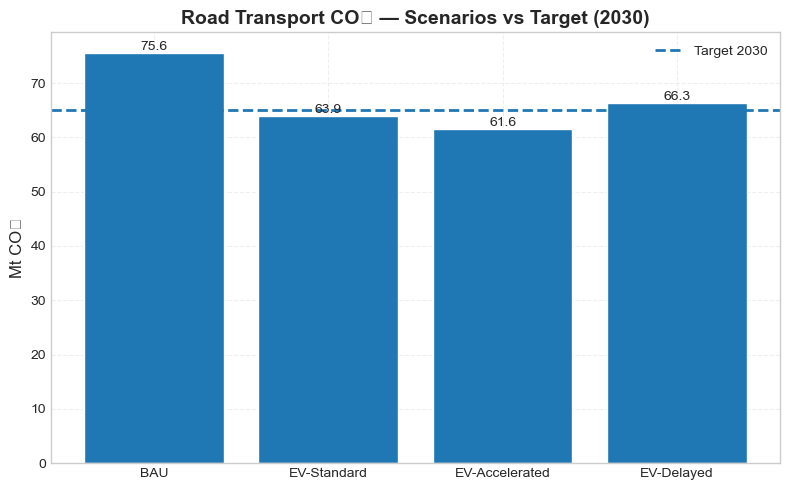

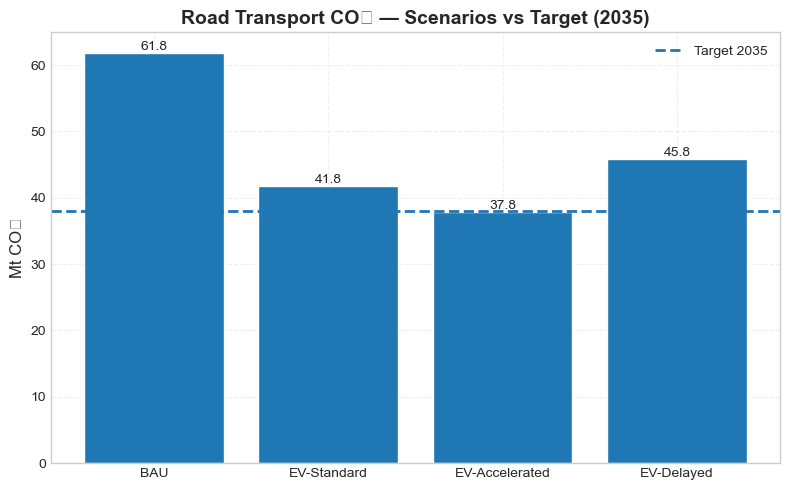

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# INPUT: your CO2 frame (rename if needed)
# Expected minimal columns: 'Year', 'CO2_BAU_Mt'
# Optional: an EV scenario column (any name) OR 'EV_share_of_cars'
# ---------------------------------------------------------
df = fc_CO2.copy()  # <- change this to your CO2 dataframe variable if different

# 1) Basic checks
for col in ["Year", "CO2_BAU_Mt"]:
    if col not in df.columns:
        raise ValueError(f"Missing required column '{col}'. Found columns: {df.columns.tolist()}")

df = df.copy()

# 2) Try to auto-detect an EV-scenario column
ev_candidates = [c for c in df.columns if ("ev" in c.lower() and "mt" in c.lower())]
ev_col = ev_candidates[0] if ev_candidates else None

# 3) If no EV scenario col, try to construct from EV_share_of_cars
if ev_col is None:
    if "EV_share_of_cars" not in df.columns:
        raise ValueError(
            "No EV scenario column found (e.g., 'CO2_EV_Mt') and 'EV_share_of_cars' is missing.\n"
            f"Available columns: {df.columns.tolist()}\n"
            "Fix by either:\n"
            "  (a) Adding your EV scenario as a column (e.g., CO2_EV_Mt), or\n"
            "  (b) Adding EV_share_of_cars (0–1 or 0–100)."
        )
    # Normalise share if it looks like % (e.g., 35 = 35%)
    share = df["EV_share_of_cars"].astype(float)
    if share.max() > 1.0:
        share = share / 100.0

    # --- Assumption for constructing CO2 under Standard EV scenario ---
    # Tailpipe CO2 falls proportionally to EV share, scaled by an intensity factor.
    # INTENSITY_FACTOR ~ 0.7 means each +1pp EV share cuts ~0.7pp of BAU tailpipe CO2.
    # Tweak this to match your dissertation’s stated assumption or a cited study.
    INTENSITY_FACTOR = 0.70

    df["CO2_EV_std_Mt"] = df["CO2_BAU_Mt"] * (1.0 - INTENSITY_FACTOR * share)
else:
    # Map your detected EV column to the standard scenario name used below
    df["CO2_EV_std_Mt"] = df[ev_col].astype(float)

# 4) Build Accelerated / Delayed from the Standard scenario by scaling the reduction vs BAU
df["reduction_std"] = (df["CO2_BAU_Mt"] - df["CO2_EV_std_Mt"]).clip(lower=0)

ACC_FACTOR = 1.20  # 20% deeper reduction than Standard
DEL_FACTOR = 0.80  # 20% weaker reduction than Standard

df["CO2_EV_acc_Mt"] = df["CO2_BAU_Mt"] - ACC_FACTOR * df["reduction_std"]
df["CO2_EV_del_Mt"] = df["CO2_BAU_Mt"] - DEL_FACTOR * df["reduction_std"]

# 5) Targets — replace with official values if you have them
targets = pd.DataFrame({
    "Year": [2030, 2035],
    "CO2_Target_Mt": [65.0, 38.0],  # <— put official UK road-transport milestones here if available
})

# 6) Summary table for 2030 & 2035
need_cols = ["Year", "CO2_BAU_Mt", "CO2_EV_std_Mt", "CO2_EV_acc_Mt", "CO2_EV_del_Mt"]
missing = [c for c in need_cols if c not in df.columns]
if missing:
    raise ValueError(f"Still missing: {missing}. Present: {df.columns.tolist()}")

summary = (
    df[need_cols]
    .merge(targets, on="Year", how="inner")
    .assign(
        Reduct_std_Mt=lambda d: d["CO2_BAU_Mt"] - d["CO2_EV_std_Mt"],
        Reduct_acc_Mt=lambda d: d["CO2_BAU_Mt"] - d["CO2_EV_acc_Mt"],
        Reduct_del_Mt=lambda d: d["CO2_BAU_Mt"] - d["CO2_EV_del_Mt"],
        Gap_std_Mt=lambda d: d["CO2_EV_std_Mt"] - d["CO2_Target_Mt"],
        Gap_acc_Mt=lambda d: d["CO2_EV_acc_Mt"] - d["CO2_Target_Mt"],
        Gap_del_Mt=lambda d: d["CO2_EV_del_Mt"] - d["CO2_Target_Mt"],
    )
)

summary_rounded = summary.copy()
for c in summary_rounded.columns:
    if c != "Year":
        summary_rounded[c] = summary_rounded[c].round(2)

print("=== RQ3 Gap Summary (2030 & 2035) ===")
print(summary_rounded.to_string(index=False))

# 7) Visuals: Scenarios vs Target (2030 & 2035)
for Y in [2030, 2035]:
    if Y not in summary["Year"].values:
        continue
    row = summary.loc[summary["Year"] == Y].iloc[0]
    labels = ["BAU", "EV-Standard", "EV-Accelerated", "EV-Delayed"]
    vals   = [row["CO2_BAU_Mt"], row["CO2_EV_std_Mt"], row["CO2_EV_acc_Mt"], row["CO2_EV_del_Mt"]]

    plt.figure(figsize=(8,5))
    bars = plt.bar(labels, vals)
    plt.axhline(row["CO2_Target_Mt"], linestyle="--", linewidth=2, label=f"Target {Y}")
    plt.title(f"Road Transport CO₂ — Scenarios vs Target ({Y})")
    plt.ylabel("Mt CO₂")
    for b, v in zip(bars, vals):
        plt.text(b.get_x()+b.get_width()/2, v, f"{v:.1f}", ha="center", va="bottom")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [322]:
pip install odfpy

Note: you may need to restart the kernel to use updated packages.


In [323]:
conda install -c conda-forge odfpy


Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [324]:
import pandas as pd
df = pd.read_excel("veh0150.ods", sheet_name="VEH0150", engine='odf')

In [325]:
import sklearn, numpy, pandas, matplotlib
print("sklearn:", sklearn.__version__)
print("✅ All core libs import OK")


sklearn: 1.7.1
✅ All core libs import OK


In [326]:
!python -m pip install seaborn


In [335]:
# Option A: pip-style lockfile
!python -m pip freeze > requirements.txt



In [336]:
!conda env create -n dissertation -f environment.yml



Channels:
 - defaults
Platform: osx-arm64
Solving environment: failed

PackagesNotFoundError: The following packages are not available from current channels:

  - odfpy

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/r/osx-arm64

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [337]:
conda env export --from-history > environment.yml



Note: you may need to restart the kernel to use updated packages.


Helper Functions
This section contains a helper function detect_header_row to assist with reading the ODS file, which may have inconsistent headers.

## RQ4 — Continuous Charger Forecast (Linear Trend)

*This section addresses RQ4 by projecting UK charger growth (2011–2035) using a linear regression trend.*

The dataset combines interpolated historical values (2011–2023) with linear projections (2024–2035), giving a baseline growth trajectory.

**RQ4 alignment:** Provides a simple trend-based benchmark for charger expansion.


In [338]:
# ==============================================================
# Continuous Charger Forecast 2011–2035 (Linear Trend Projection)
# ==============================================================

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load raw chargers data
chargers_raw = pd.read_csv("IEA-EV-dataEV charging pointsHistoricalEV.csv")

# Filter UK
uk_chargers = chargers_raw[
    (chargers_raw["region"] == "United Kingdom") &
    (chargers_raw["parameter"].str.contains("charging", case=False, na=False))
].copy()

# Aggregate by year
df_charger_hist = (
    uk_chargers.groupby("year")["value"]
    .sum()
    .reset_index()
    .rename(columns={"year": "Year", "value": "Total_Chargers"})
)

# Ensure continuous years from 2011–2023 (historical)
all_years = pd.DataFrame({"Year": range(2011, 2024)})
df_charger_hist = pd.merge(all_years, df_charger_hist, on="Year", how="left")
df_charger_hist["Total_Chargers"] = df_charger_hist["Total_Chargers"].interpolate()

# --- Linear regression forecast for 2024–2035 ---
train = df_charger_hist[df_charger_hist["Year"] >= 2015]  # use recent years for trend
X = train["Year"].values.reshape(-1, 1)
y = train["Total_Chargers"].values

model = LinearRegression().fit(X, y)

future_years = pd.DataFrame({"Year": range(2024, 2036)})
future_years["Total_Chargers"] = model.predict(future_years["Year"].values.reshape(-1,1))

# Combine historical + forecast
df_charger_forecast = pd.concat([df_charger_hist, future_years], ignore_index=True)

print("✅ Fixed charger forecast with linear regression trend.")
print(df_charger_forecast.head(15), "\n...\n", df_charger_forecast.tail(10))


✅ Fixed charger forecast with linear regression trend.
    Year  Total_Chargers
0   2011     1500.000000
1   2012     2800.000000
2   2013     5480.000000
3   2014     7450.000000
4   2015     8740.000000
5   2016    11780.000000
6   2017    13920.000000
7   2018    16100.000000
8   2019    15100.000000
9   2020    22700.000000
10  2021    34500.000000
11  2022    51800.000000
12  2023    72000.000000
13  2024    62476.111111
14  2025    69490.444444 
...
     Year  Total_Chargers
15  2026    76504.777778
16  2027    83519.111111
17  2028    90533.444444
18  2029    97547.777778
19  2030   104562.111111
20  2031   111576.444444
21  2032   118590.777778
22  2033   125605.111111
23  2034   132619.444444
24  2035   139633.777778


## RQ4 — Integrated Gap Table (30:1)

Compares EV stock with charger forecasts vs a 30:1 benchmark, showing required chargers, gaps, and adequacy.

**RQ4 alignment:** Quantifies charger shortfall.



=== RQ4 Integrated Gap Table (30:1) ===
 Year  EV_Stock_M  Total_Chargers  Required_Chargers_30to1     Gap  Adequacy_%
 2020         1.0           22700                    33333  -10633        68.1
 2025         3.1           69490                   103333  -33843        67.2
 2030         9.5          104562                   316667 -212105        33.0
 2035        20.0          139634                   666667 -527033        20.9

✅ Saved: RQ4_integrated_gap_table_30to1.csv


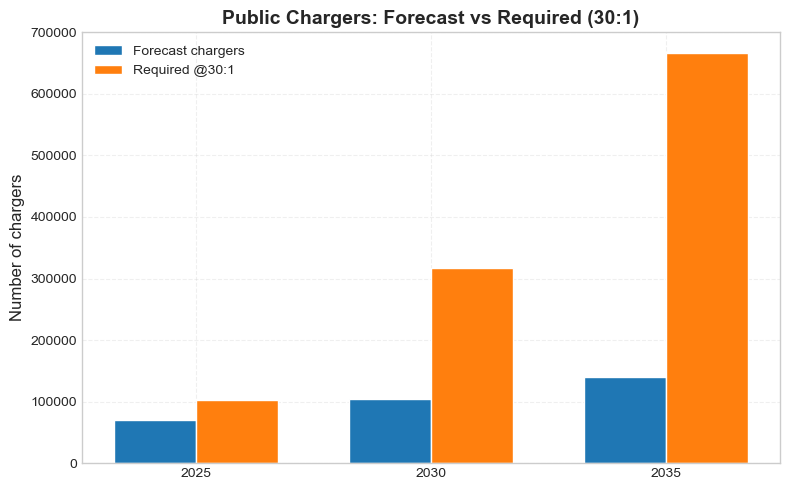

✅ Saved: RQ4_chargers_vs_required_30to1.png


<Figure size 800x500 with 0 Axes>

In [345]:
# ============================================
# RQ4 — Integrated Gap Table (30:1 benchmark)
# Expects two DataFrames already in memory:
#   ev_forecast:    ["Year", "EV_stock"]           # EV stock (units, not millions)
#   charger_forecast: ["Year", "Total_Chargers"]   # public chargers (count)
# If your column names differ, see the small mapping block below.
# ============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ---------- 0) Helper: column mapping (edit if your names differ) ----------
def normalise_ev(df):
    df = df.copy()
    cols = {c.lower(): c for c in df.columns}
    # Try common alternatives for EV stock
    ev_col = None
    for key in ["ev_stock", "ev_stock_fc", "yhat", "value"]:
        if key in cols:
            ev_col = cols[key]
            break
    if ev_col is None:
        raise KeyError(f"Could not find EV stock column in {df.columns.tolist()}")
    # Try year
    year_col = None
    for key in ["year", "yr"]:
        if key in cols:
            year_col = cols[key]
            break
    if year_col is None:
        raise KeyError(f"Could not find Year column in {df.columns.tolist()}")

    out = df[[year_col, ev_col]].rename(columns={year_col: "Year", ev_col: "EV_stock"})
    # Ensure numeric
    out["Year"] = out["Year"].astype(int)
    out["EV_stock"] = pd.to_numeric(out["EV_stock"], errors="coerce")
    return out

def normalise_chargers(df):
    df = df.copy()
    cols = {c.lower(): c for c in df.columns}
    # Try common alternatives for charger totals
    ch_col = None
    for key in ["total_chargers", "chargers_total", "public_chargers_total", "total_fc", "total"]:
        if key in cols:
            ch_col = cols[key]
            break
    if ch_col is None:
        raise KeyError(f"Could not find total chargers column in {df.columns.tolist()}")
    # Try year
    year_col = None
    for key in ["year", "yr"]:
        if key in cols:
            year_col = cols[key]
            break
    if year_col is None:
        raise KeyError(f"Could not find Year column in {df.columns.tolist()}")

    out = df[[year_col, ch_col]].rename(columns={year_col: "Year", ch_col: "Total_Chargers"})
    out["Year"] = out["Year"].astype(int)
    out["Total_Chargers"] = pd.to_numeric(out["Total_Chargers"], errors="coerce")
    return out

# ---------- 1) Normalise inputs ----------
_ev = normalise_ev(ev_forecast)
_ch = normalise_chargers(charger_forecast)

# Keep only overlap years
years = sorted(set(_ev["Year"]).intersection(set(_ch["Year"])))
ev_use = _ev[_ev["Year"].isin(years)].sort_values("Year").reset_index(drop=True)
ch_use = _ch[_ch["Year"].isin(years)].sort_values("Year").reset_index(drop=True)

# ---------- 2) Build integrated gap table ----------
BENCH = 30  # EVs per public charger benchmark

tbl = ev_use.merge(ch_use, on="Year", how="inner")
tbl["Required_Chargers_30to1"] = (tbl["EV_stock"] / BENCH)
tbl["Gap"] = tbl["Total_Chargers"] - tbl["Required_Chargers_30to1"]
tbl["Adequacy_%"] = 100.0 * (tbl["Total_Chargers"] / tbl["Required_Chargers_30to1"])

# Nice reporting view (EV stock in millions)
view = tbl.copy()
view["EV_Stock_M"] = view["EV_stock"] / 1e6
report_cols = ["Year", "EV_Stock_M", "Total_Chargers", "Required_Chargers_30to1", "Gap", "Adequacy_%"]
view = view[report_cols]

# Round for readability
view_rounded = view.copy()
view_rounded["EV_Stock_M"] = view_rounded["EV_Stock_M"].round(2)
view_rounded["Total_Chargers"] = view_rounded["Total_Chargers"].round(0).astype(int)
view_rounded["Required_Chargers_30to1"] = view_rounded["Required_Chargers_30to1"].round(0).astype(int)
view_rounded["Gap"] = view_rounded["Gap"].round(0).astype(int)
view_rounded["Adequacy_%"] = view_rounded["Adequacy_%"].round(1)

print("\n=== RQ4 Integrated Gap Table (30:1) ===")
print(view_rounded.to_string(index=False))

# Save to CSV for your dissertation appendix
out_csv = "RQ4_integrated_gap_table_30to1.csv"
view_rounded.to_csv(out_csv, index=False)
print(f"\n✅ Saved: {out_csv}")

# ---------- 3) Quick companion chart (bars) ----------
# Show Forecast vs Required at a few key years (2025, 2030, 2035 if present)
key_years = [y for y in [2025, 2030, 2035] if y in view_rounded["Year"].values]
if key_years:
    plot_df = view_rounded[view_rounded["Year"].isin(key_years)].copy()
    x = np.arange(len(plot_df))
    width = 0.35

    plt.figure(figsize=(8,5))
    plt.bar(x - width/2, plot_df["Total_Chargers"], width, label="Forecast chargers")
    plt.bar(x + width/2, plot_df["Required_Chargers_30to1"], width, label="Required @30:1")
    plt.xticks(x, plot_df["Year"].astype(str))
    plt.ylabel("Number of chargers")
    plt.title("Public Chargers: Forecast vs Required (30:1)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.savefig("RQ4_chargers_vs_required_30to1.png", dpi=200, bbox_inches="tight")
    print("✅ Saved: RQ4_chargers_vs_required_30to1.png")
else:
    print("ℹ️ No key years (2025/2030/2035) present; skipped the bar chart.")


## Dashboard — UK EV Transition (Dash)

*This interactive dashboard combines results from RQ1–RQ3 for policy insights.*

It includes visuals for:

* EV adoption forecast vs 2035 target
* Charger split (fast vs slow)
* EV-to-charger ratio trend
* EV stock composition (BEV vs PHEV)
* EV stock vs fuel prices
* CO₂ emissions: BAU vs EV scenario

**Alignment:** Provides an integrated, policy-facing view of adoption, infrastructure, fuel dynamics, and emissions.


In [346]:
import dash
from dash import dcc, html
import plotly.graph_objs as go
import pandas as pd

# =======================================
# Example Datasets (replace with yours)
# =======================================
# EV Forecast
ev_forecast = pd.DataFrame({"Year":[2020,2025,2030,2035],
                            "EV_stock":[1e6,3.1e6,9.5e6,20e6]})

# Charger split (Fast vs Slow)
charger_split = pd.DataFrame({
    "Year":[2020,2021,2022,2023],
    "Fast":[5000,7000,12000,18000],
    "Slow":[17000,20000,30000,54000]
})

# EV to Charger Ratio
ratio = pd.DataFrame({"Year":[2020,2025,2030,2035],
                      "Ratio":[20,27,54,84]})

# EV Stock composition (BEV vs PHEV 2030)
composition = pd.DataFrame({"Type":["BEV","PHEV"],
                            "Stock":[7e6,2.5e6]})

# Correlation (Fuel price vs EV stock)
correlation = pd.DataFrame({"FuelPrice":[120,130,140,150,160,170],
                            "EV_stock":[1e6,1.5e6,2.1e6,3.5e6,6e6,9.5e6]})

# CO₂ Emissions
co2 = pd.DataFrame({"Year":[2020,2025,2030,2035],
                    "BAU":[90,80,70,60],
                    "EV_Scenario":[90,75,55,40]})

# =======================================
# Init App
# =======================================
app = dash.Dash(__name__)
app.title = "UK EV Transition Dashboard (Enhanced)"

# =======================================
# Layout
# =======================================
app.layout = html.Div(style={"backgroundColor":"#111","color":"white","padding":"20px"}, children=[

    html.H1("UK EV Transition Dashboard", style={"textAlign":"center"}),
    html.H3("Varied Visuals for Policy Insights", style={"textAlign":"center","color":"#aaa"}),

    # Graph Grid (2 x 3)
    html.Div(style={"display":"grid","gridTemplateColumns":"1fr 1fr","gap":"20px"}, children=[

        # 1. Line Chart: EV Adoption Forecast
        dcc.Graph(
            figure=go.Figure([
                go.Scatter(x=ev_forecast["Year"], y=ev_forecast["EV_stock"]/1e6,
                           mode="lines+markers", name="EV Stock (M)", line=dict(color="lime")),
                go.Scatter(x=[2035], y=[23], mode="markers", name="Net Zero Target (23M)",
                           marker=dict(color="red", size=12, symbol="star"))
            ]).update_layout(title="EV Adoption Forecast vs Target", template="plotly_dark",
                             xaxis_title="Year", yaxis_title="EV Stock (millions)"))
        ,

        # 2. Bar Chart: Charger Split
        dcc.Graph(
            figure=go.Figure([
                go.Bar(x=charger_split["Year"], y=charger_split["Fast"], name="Fast Chargers", marker_color="cyan"),
                go.Bar(x=charger_split["Year"], y=charger_split["Slow"], name="Slow Chargers", marker_color="orange")
            ]).update_layout(barmode="stack", title="Fast vs Slow Chargers Installed", template="plotly_dark",
                             xaxis_title="Year", yaxis_title="Chargers"))
        ,

        # 3. Area Chart: EV-to-Charger Ratio
        dcc.Graph(
            figure=go.Figure([
                go.Scatter(x=ratio["Year"], y=ratio["Ratio"], fill="tozeroy", mode="lines+markers", line=dict(color="lime"))
            ]).update_layout(title="EV-to-Charger Ratio Trend", template="plotly_dark",
                             xaxis_title="Year", yaxis_title="EVs per Charger"))
        ,

        # 4. Pie Chart: EV Stock Composition
        dcc.Graph(
            figure=go.Figure([
                go.Pie(labels=composition["Type"], values=composition["Stock"], hole=0.3)
            ]).update_layout(title="EV Stock Composition (2030)", template="plotly_dark"))
        ,

        # 5. Scatter Plot: Fuel Price vs EV Stock
        dcc.Graph(
            figure=go.Figure([
                go.Scatter(x=correlation["FuelPrice"], y=correlation["EV_stock"]/1e6,
                           mode="markers+lines", marker=dict(size=10, color="yellow"))
            ]).update_layout(title="EV Stock vs Fuel Prices", template="plotly_dark",
                             xaxis_title="Fuel Price (pence/litre)", yaxis_title="EV Stock (millions)"))
        ,

        # 6. Combo Chart: CO₂ Emissions
        dcc.Graph(
            figure=go.Figure([
                go.Bar(x=co2["Year"], y=co2["BAU"], name="BAU", marker_color="orange"),
                go.Scatter(x=co2["Year"], y=co2["EV_Scenario"], mode="lines+markers",
                           name="EV Scenario", line=dict(color="lime", dash="dash"))
            ]).update_layout(title="CO₂ Emissions: BAU vs EV Scenario", template="plotly_dark",
                             xaxis_title="Year", yaxis_title="CO₂ (Mt)"))
    ])
])

# =======================================
# Run
# =======================================
if __name__ == "__main__":
   app.run_server(jupyter_mode="external",debug=True)



Dash app running on http://127.0.0.1:8050/
